- This notebook is for analyzing data form Stack Overflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

## 1. Gather Data and Asses Data
- The data is from Stack Overflow, it can be download form here: https://www.kaggle.com/stackoverflow/so-survey-2017/data
- Then we use pandas to read the csv file, we see there are 12891 samples, and 21107 features. And in this dataset, it has nan values and catergorical and numeric values.

In [2]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize  ... StackOverflowMakeMoney Gender  \
0                       NaN  ...      Strongly disagree   Male   
1        20 to 99 employees  ...      Strongly disagree   Male   
2  10,000 or more employees  ...               Disagree   Male   
3  10,000 or more employees  ...               Disagree   Male   
4        10 to 19 employees  ...                    NaN    NaN   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   
3       A doctoral degree  White or of European descent              Agree   
4                     NaN                           NaN                NaN   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   
3                Agree     Somewhat agree    Strongly agree       NaN   
4                  NaN                NaN               NaN       NaN   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 154 columns]

In [51]:
df.shape

(12891, 21107)

## 2. Prepare Data

In [ ]:
df=df.dropna(subset=['Salary'], axis=0)
   
y=df['Salary']
df=df.drop(['Salary','Respondent', 'ExpectedSalary'],axis=1)

fill_mean = lambda col: col.fillna(col.mean(),inplace=True)
# Fill the mean

num_vars = df.select_dtypes(include=['float','int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

cat_vars = df.select_dtypes(include=['object']).columns
for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)



X=df

- we basically clean the data by remove nan values in the Salary column, since it's the property that we are interested.
- Secondly, we change catergorical features to numeric by using 'get_dummies' function in pandas

## 3. Modeling

- We firstly split data to training set and testing set, and then use training set to train the linear model by using scikit learn library.
- Once we trained the model, we can use the model to predict values in testing set, and evaluate model by showing R2

### Begining with this dataset, I propose 3 questions to ask:
- 1. What's the relationship between EmploymentStatus and Salary
- 2. What's the relationship between Country and Salary
- 3. What's the factor is the most important features that decide salary

### Question 1

In [12]:
df1 = df[['EmploymentStatus','Salary']]

In [13]:
df1

EmploymentStatus    Salary
0      Not employed, and not looking for work       NaN
1                          Employed part-time       NaN
2                          Employed full-time  113750.0
3                          Employed full-time       NaN
4                          Employed full-time       NaN
...                                       ...       ...
51387                      Employed full-time   58000.0
51388                      Employed full-time       NaN
51389                      Employed full-time       NaN
51390                      Employed full-time   40000.0
51391                      Employed full-time       NaN

[51392 rows x 2 columns]

In [14]:
df1=df1.dropna(subset=['Salary'], axis=0)
df1

EmploymentStatus         Salary
2      Employed full-time  113750.000000
14     Employed full-time  100000.000000
17     Employed full-time  130000.000000
18     Employed full-time   82500.000000
22     Employed full-time  100764.000000
...                   ...            ...
51371  Employed full-time   74193.548387
51378  Employed part-time  107526.881720
51382  Employed full-time   32258.064516
51387  Employed full-time   58000.000000
51390  Employed full-time   40000.000000

[12891 rows x 2 columns]

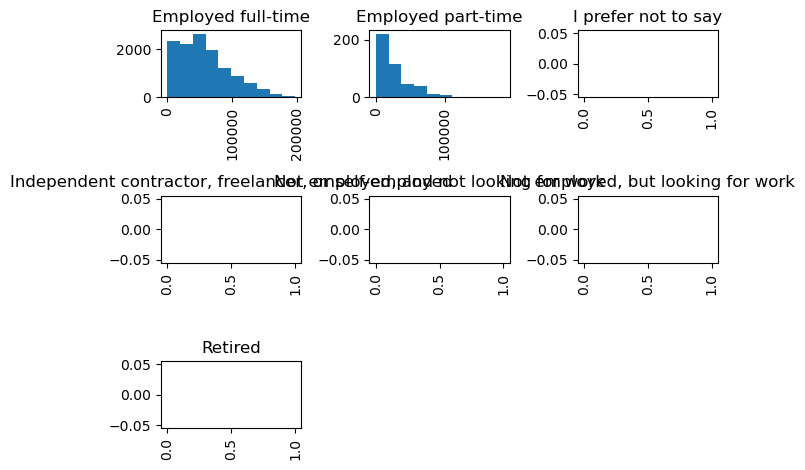

In [17]:
df['Salary'].hist(by=df['EmploymentStatus']);
plt.tight_layout()

#### As we can see from the results, people with full-time position will have higer salary between 100000-200000, but part-time job rarely have high salary.

### Question 2

In [19]:
df1 = df[['Country','Salary']]

In [20]:
df1

Country    Salary
0       United States       NaN
1      United Kingdom       NaN
2      United Kingdom  113750.0
3       United States       NaN
4         Switzerland       NaN
...               ...       ...
51387   United States   58000.0
51388       Venezuela       NaN
51389          Canada       NaN
51390   United States   40000.0
51391         Ireland       NaN

[51392 rows x 2 columns]

In [21]:
df1=df1.dropna(subset=['Salary'], axis=0)
df1

Country         Salary
2      United Kingdom  113750.000000
14     United Kingdom  100000.000000
17      United States  130000.000000
18      United States   82500.000000
22             Israel  100764.000000
...               ...            ...
51371     Netherlands   74193.548387
51378          Cyprus  107526.881720
51382          France   32258.064516
51387   United States   58000.000000
51390   United States   40000.000000

[12891 rows x 2 columns]

In [27]:
len(set(df['Country'].values))


201

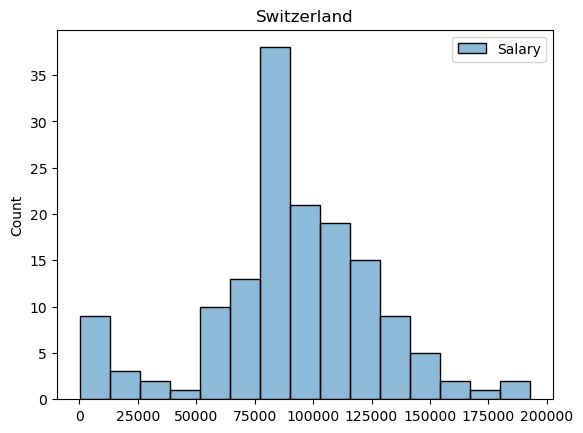

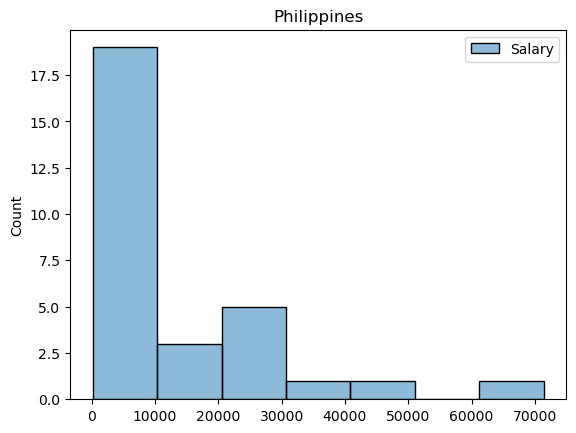

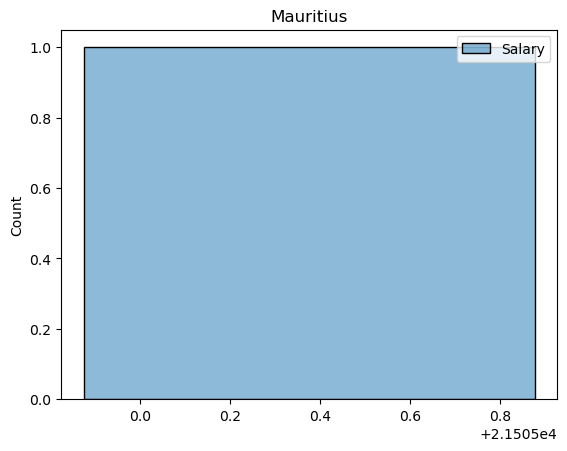

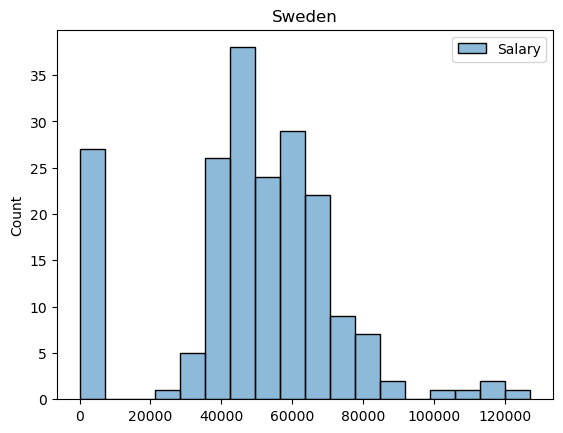

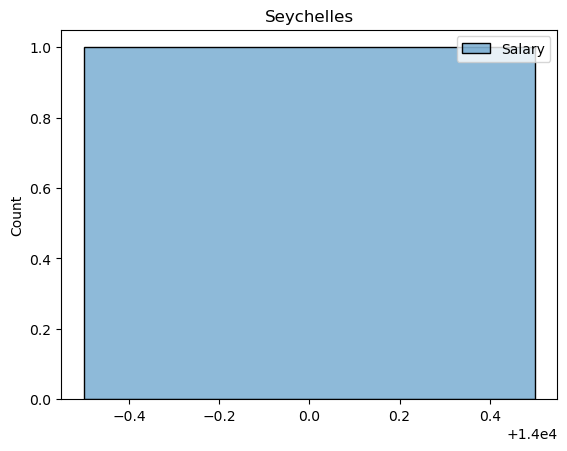

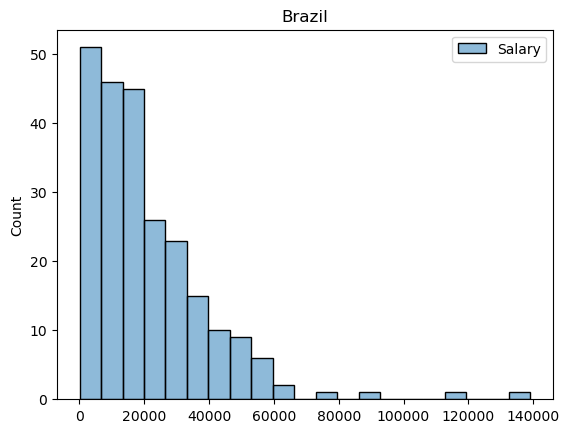

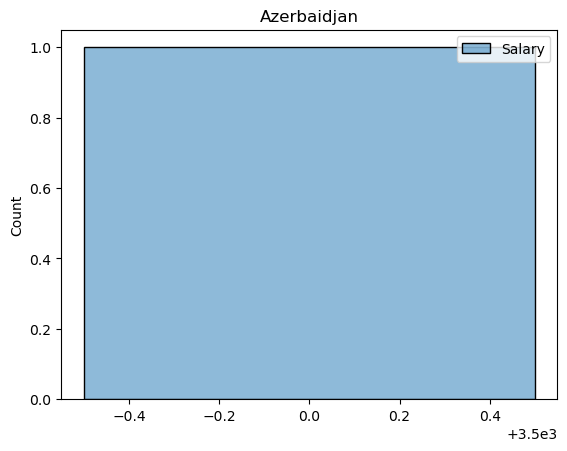

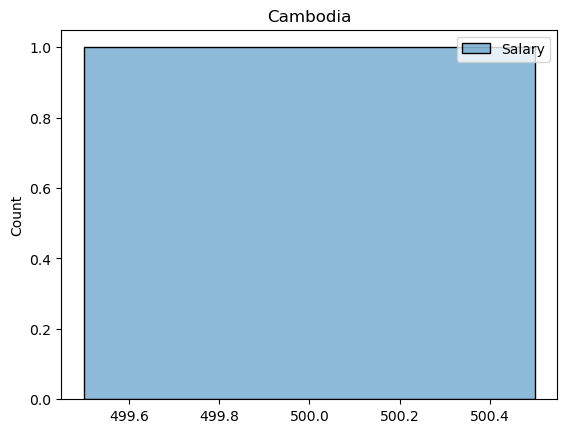

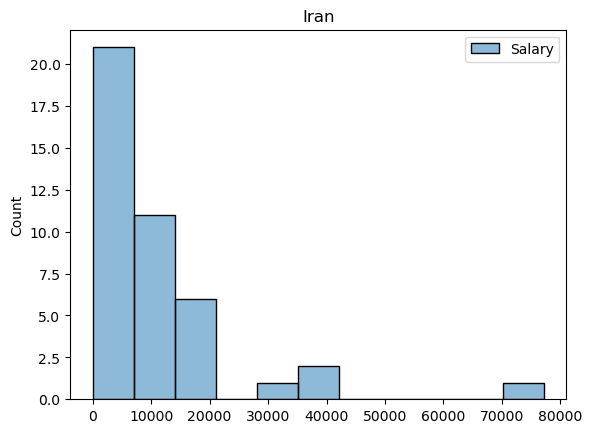

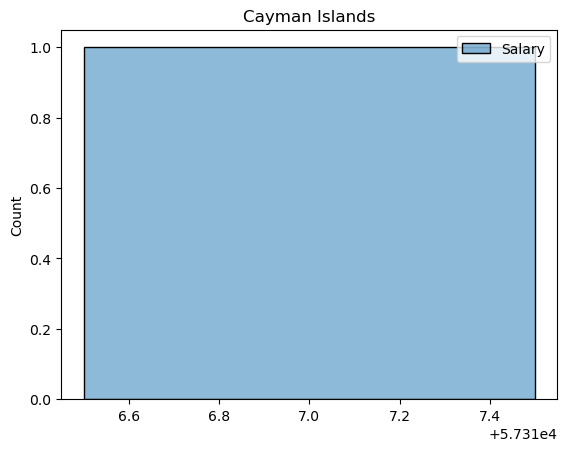

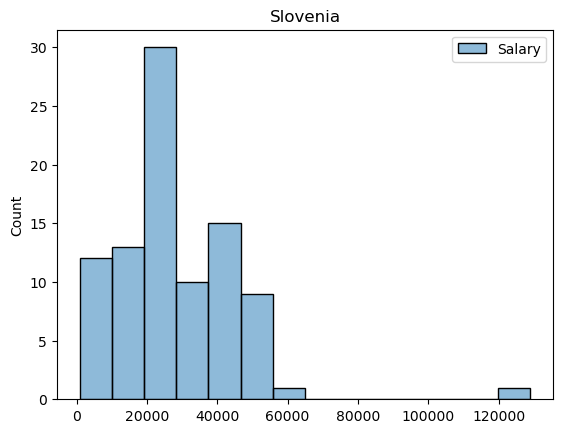

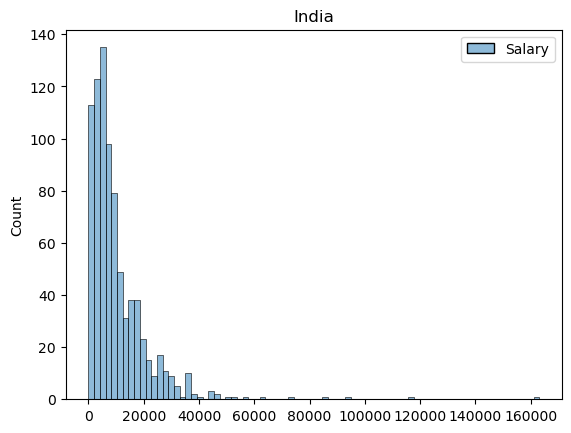

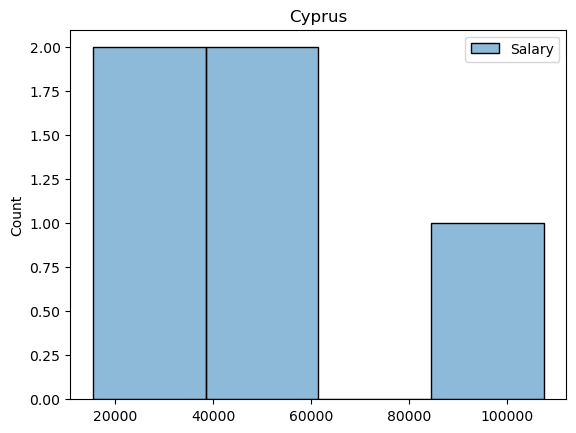

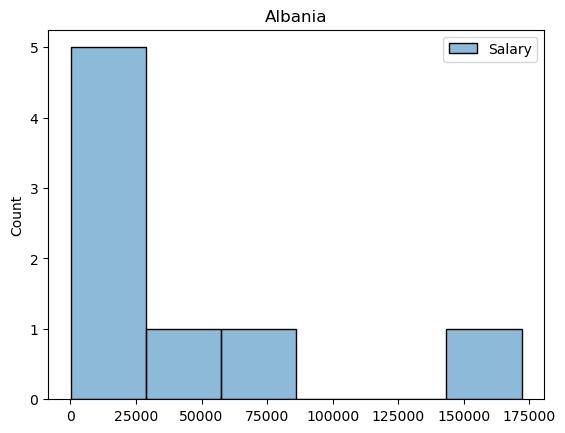

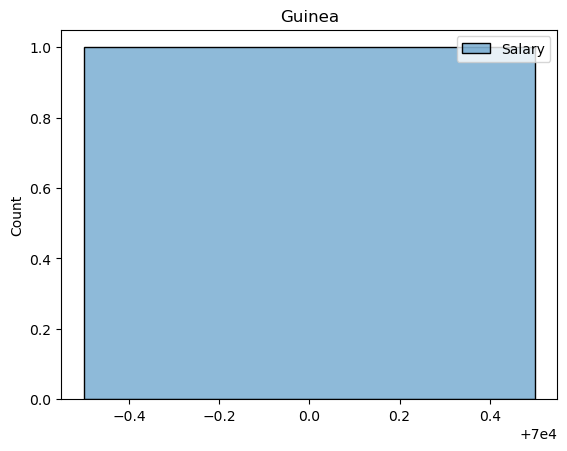

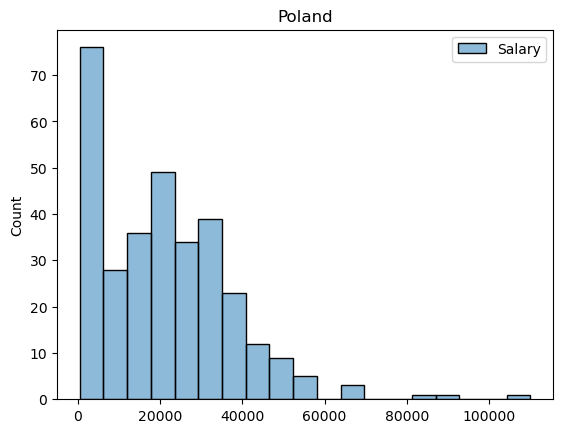

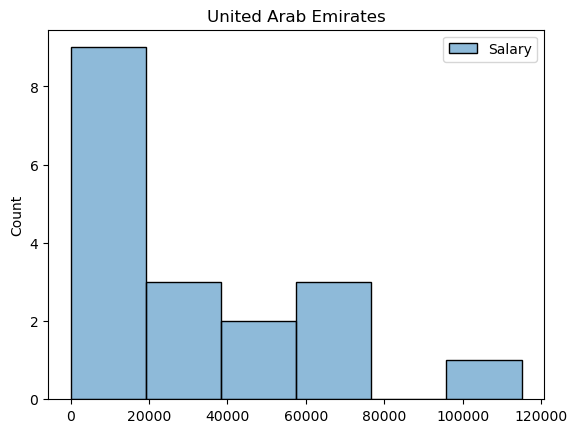

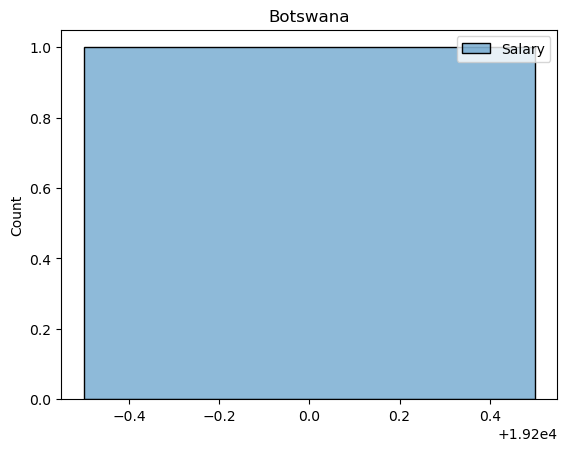

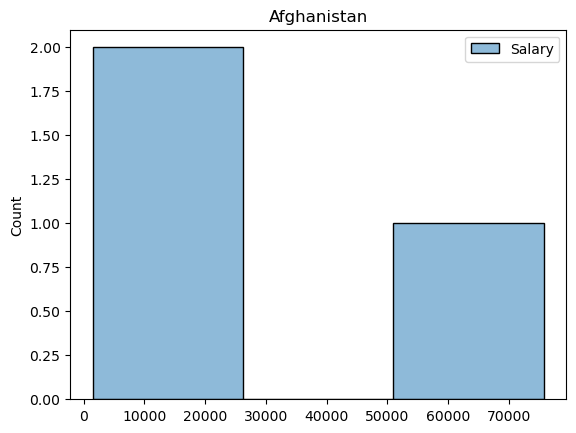

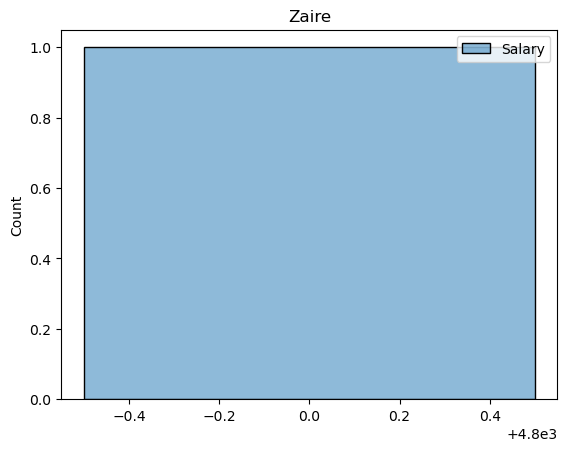

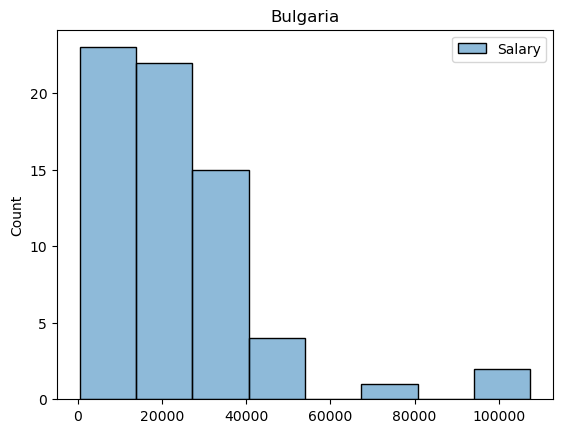

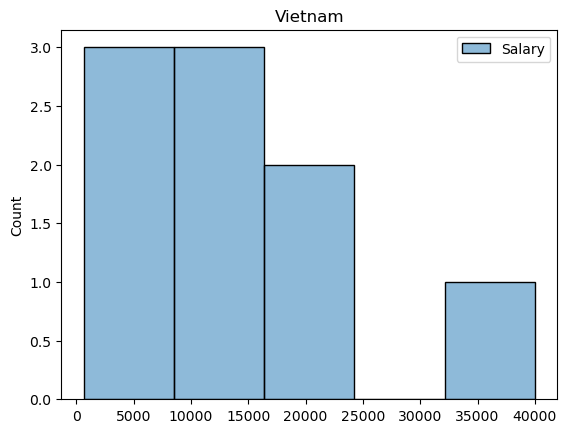

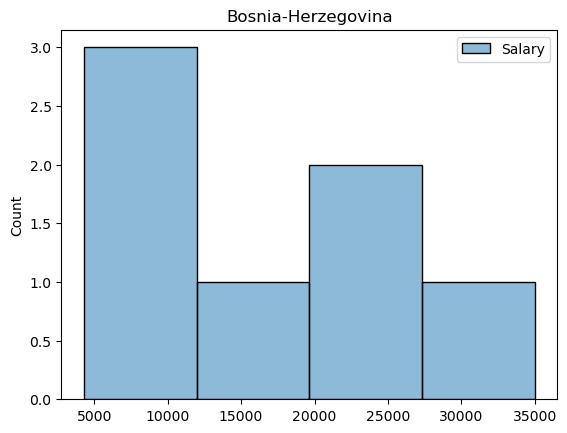

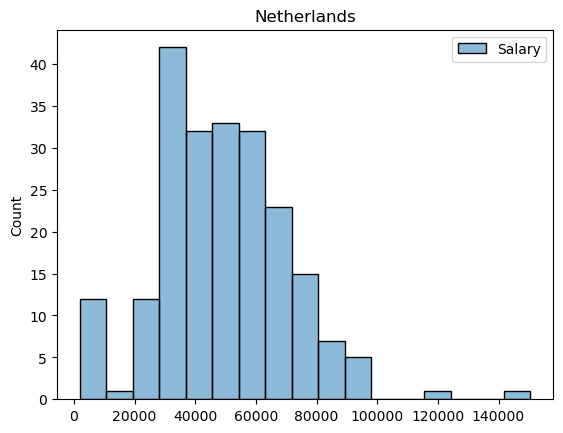

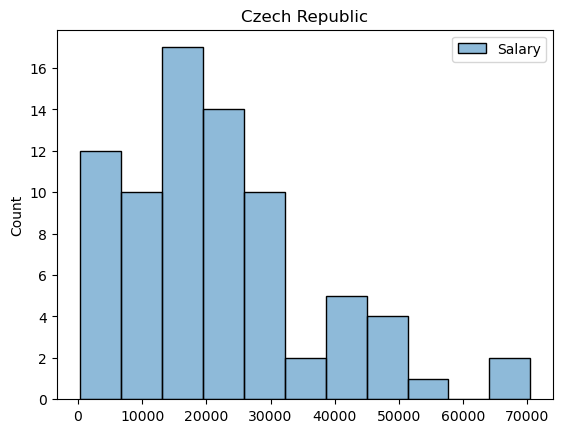

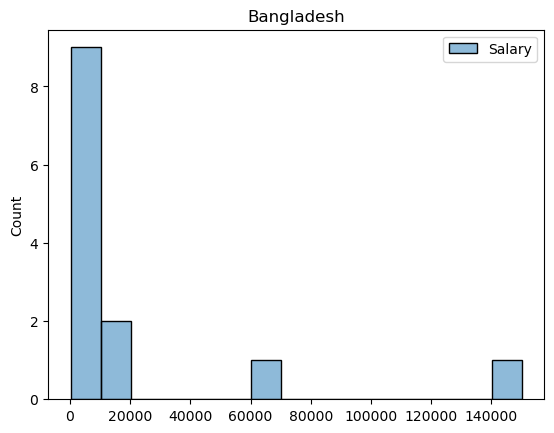

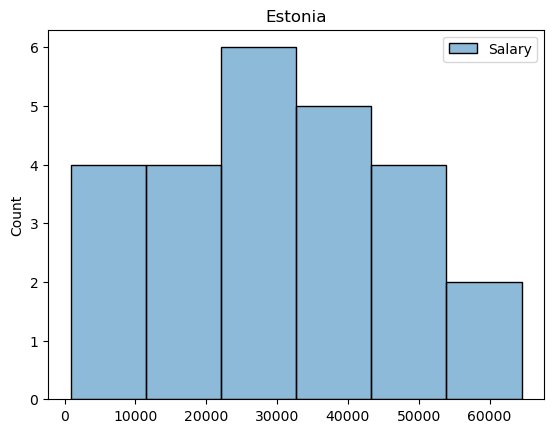

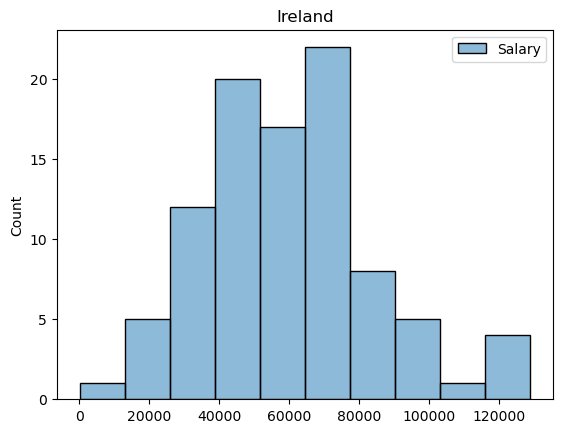

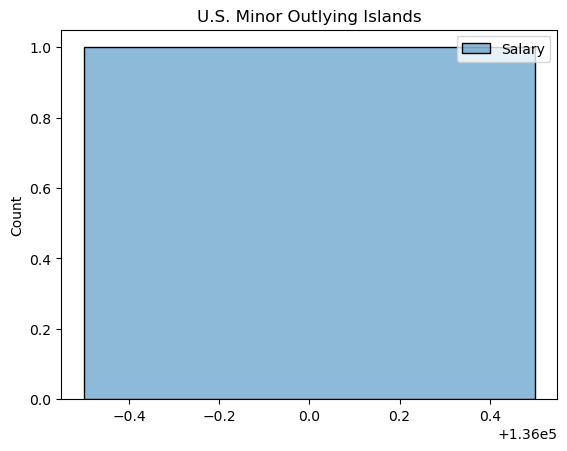

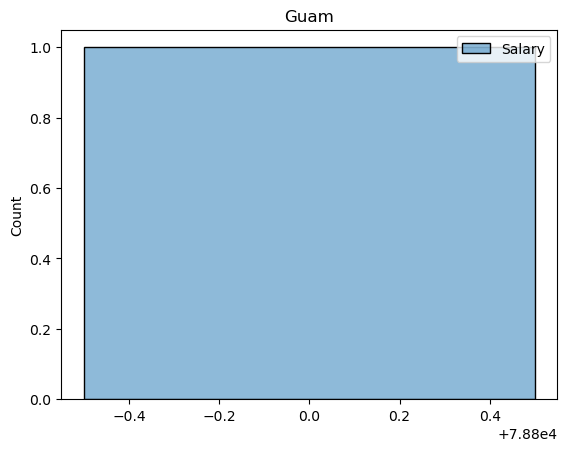

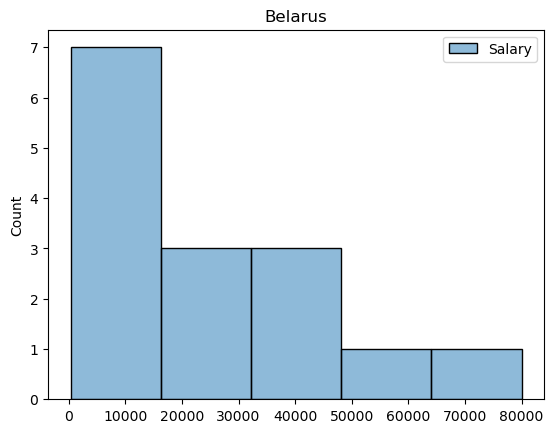

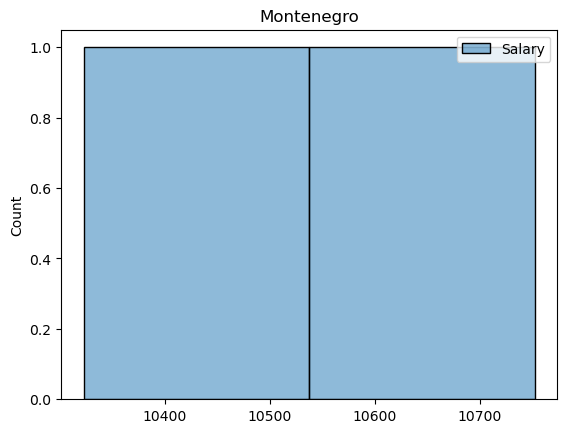

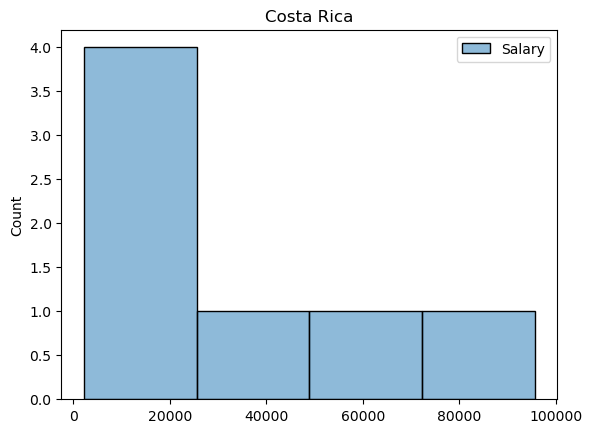

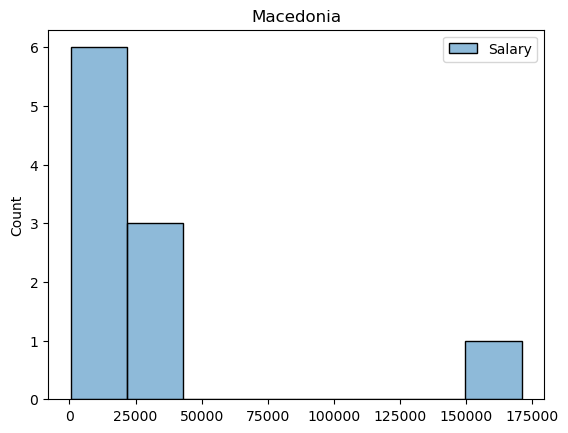

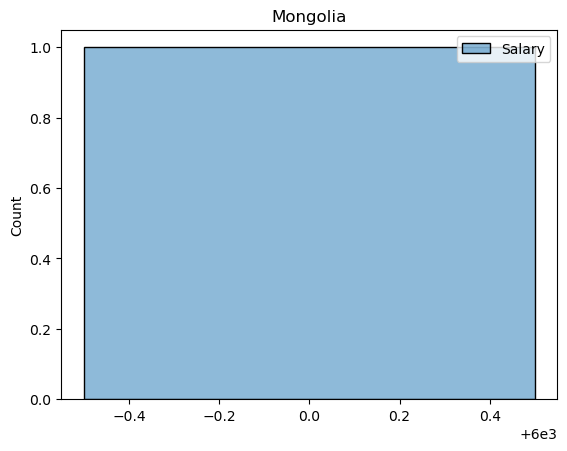

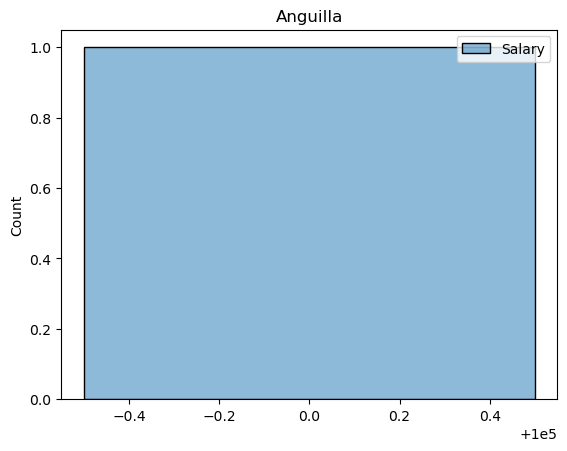

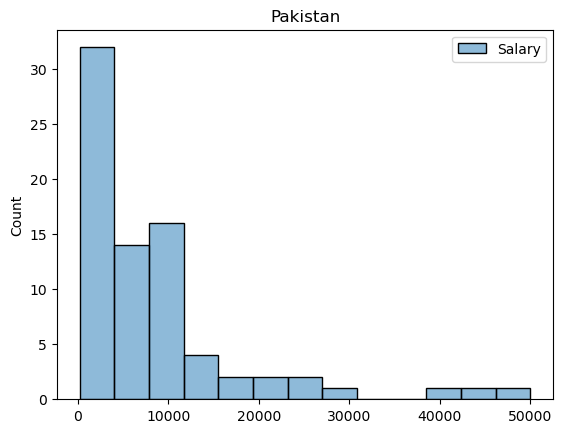

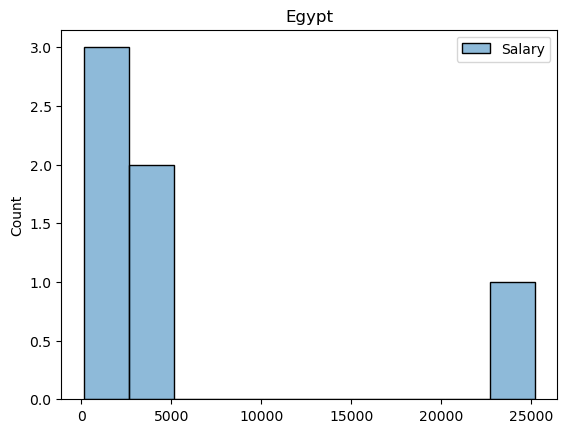

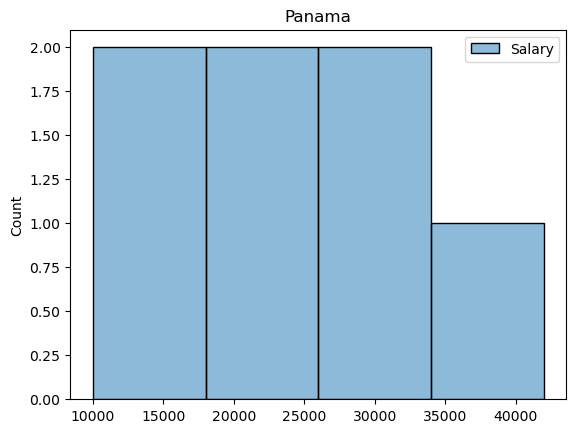

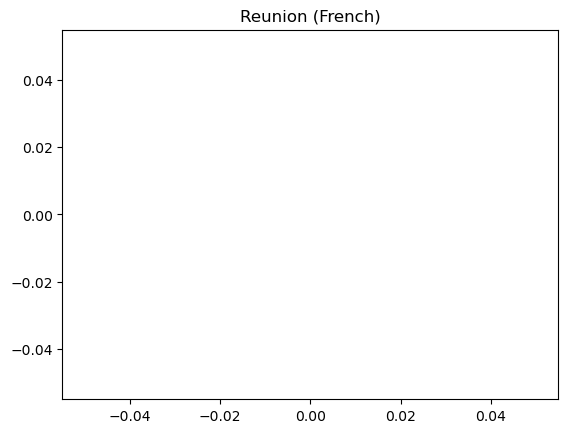

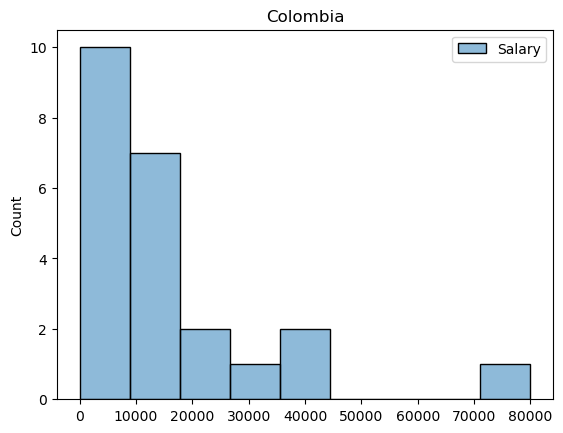

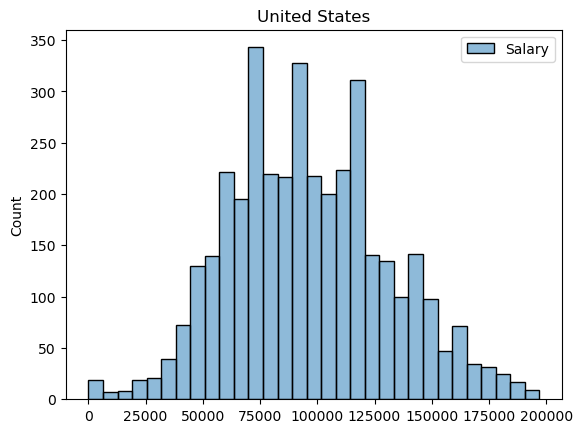

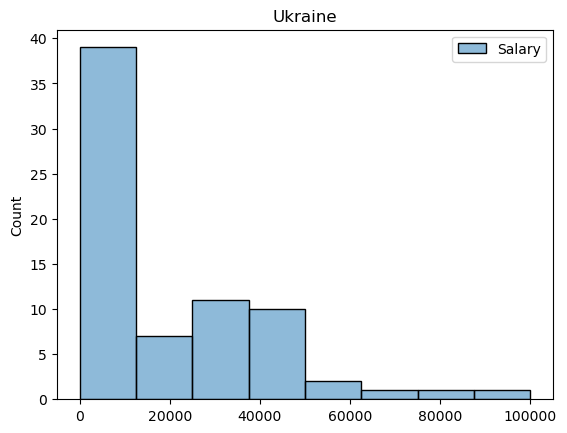

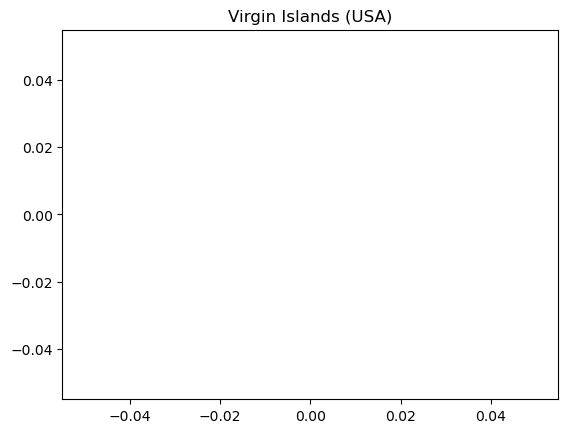

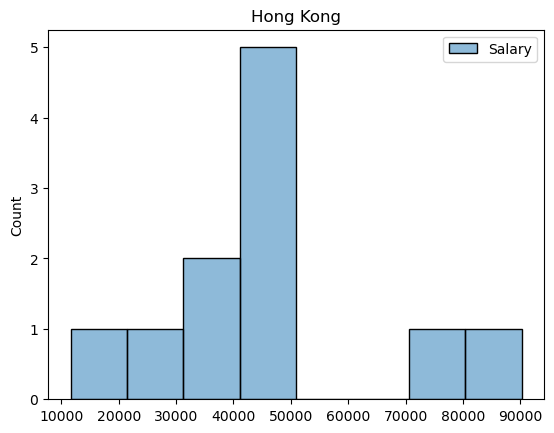

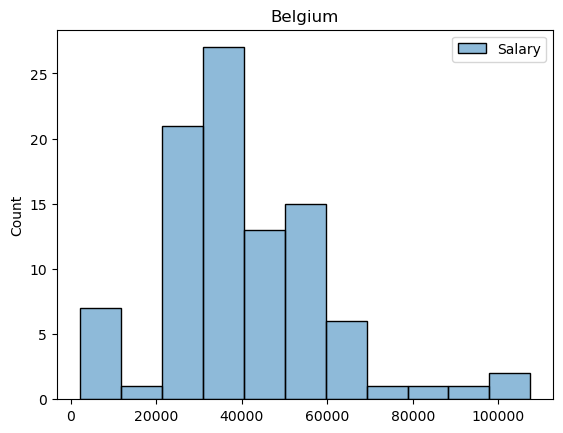

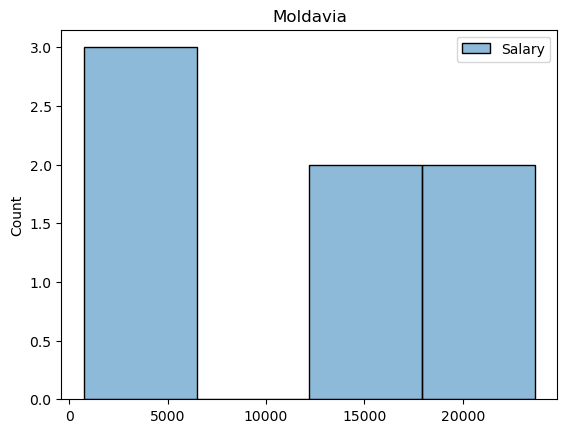

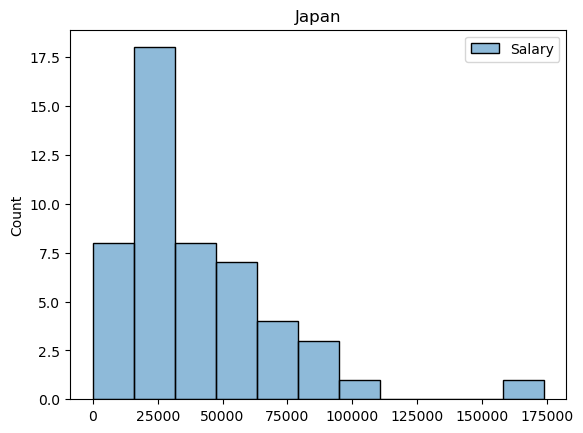

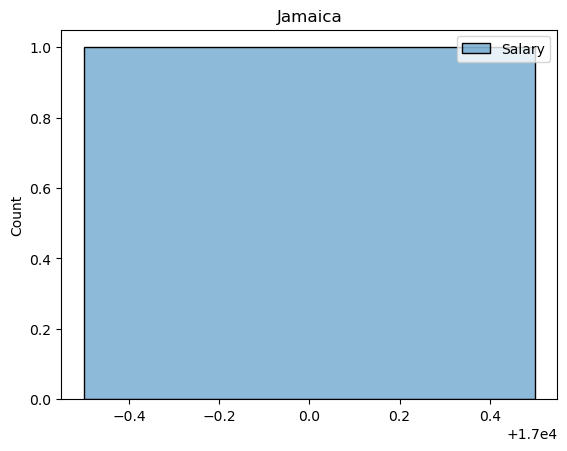

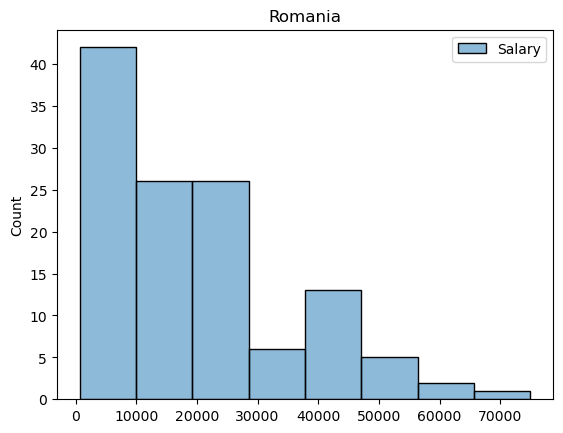

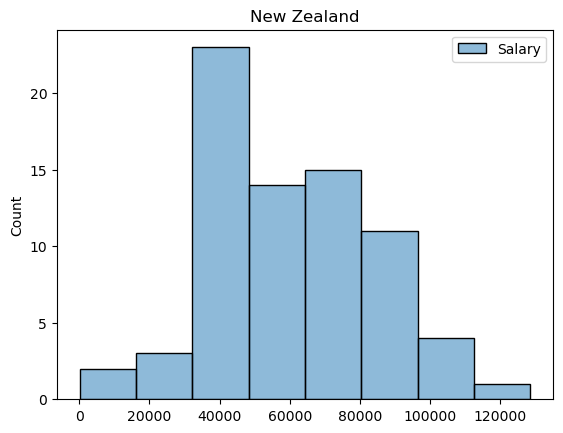

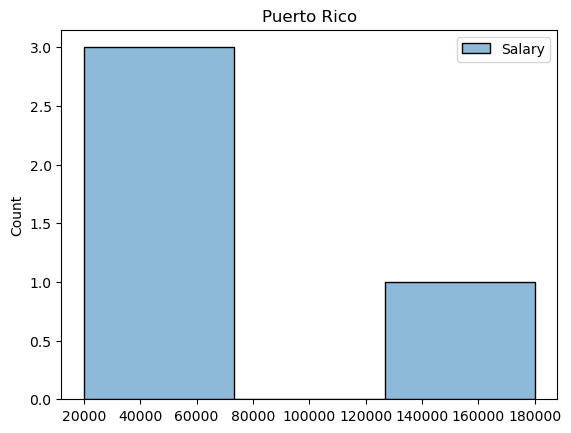

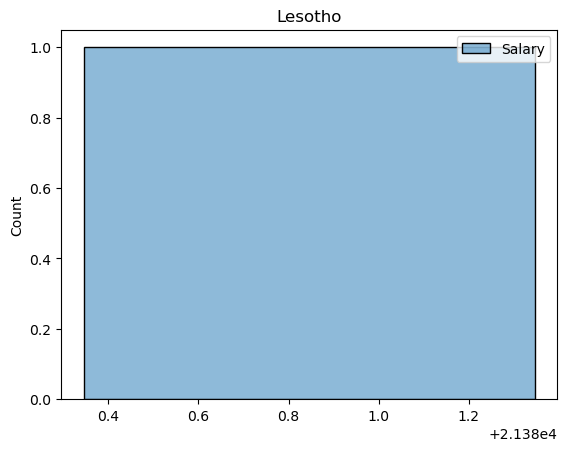

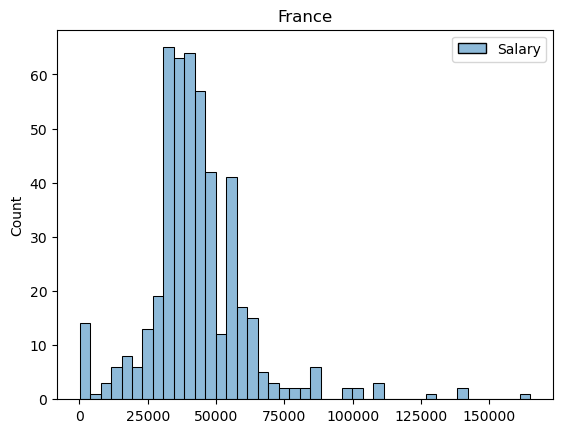

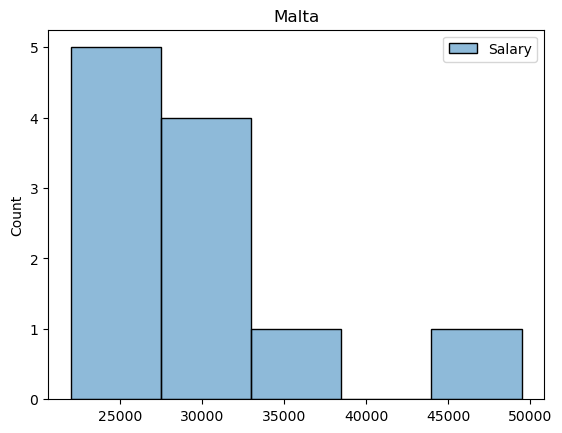

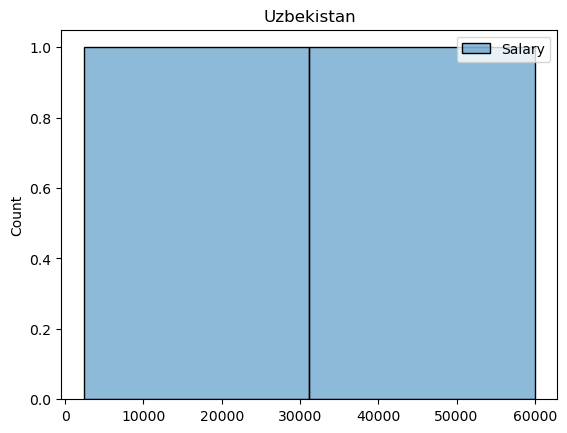

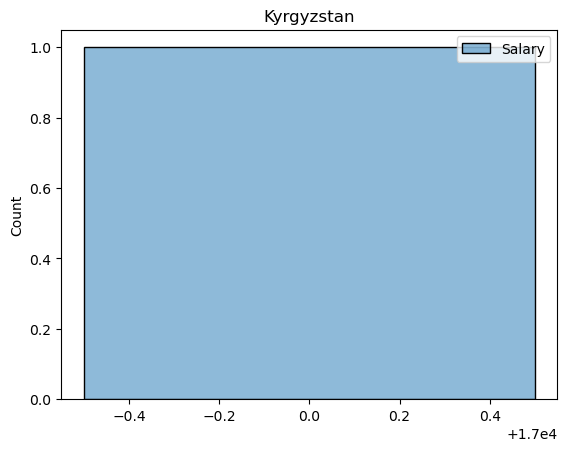

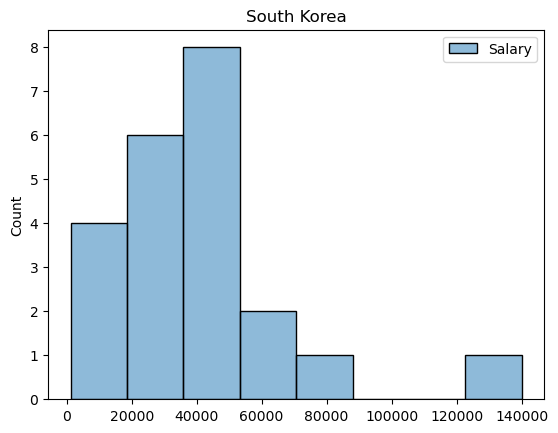

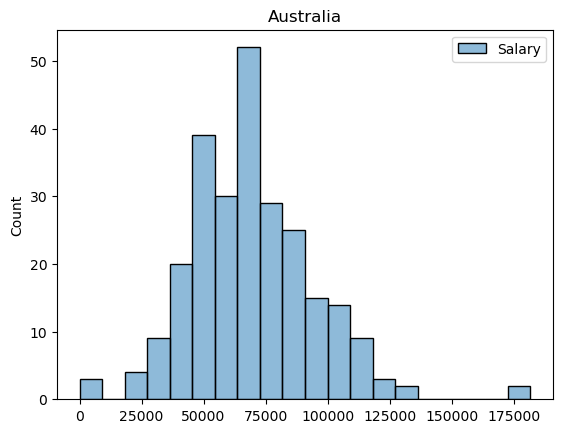

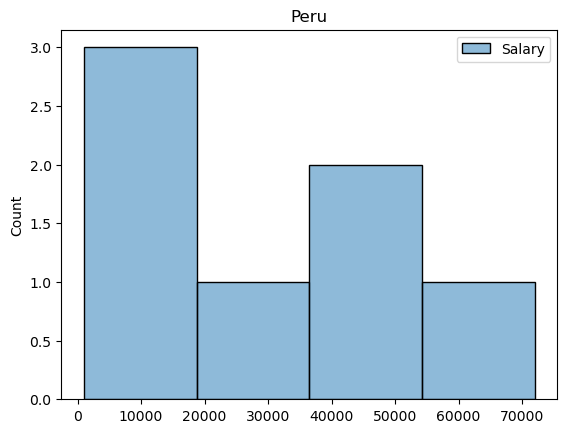

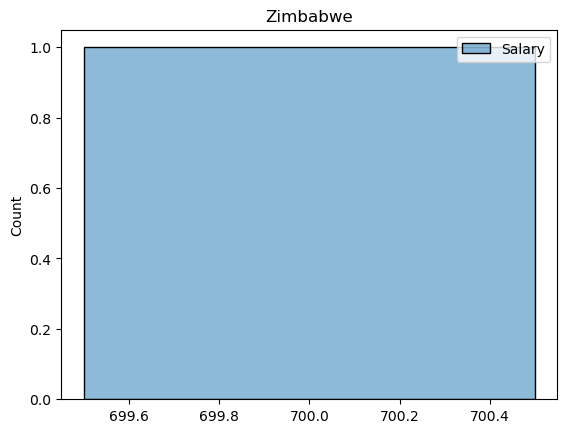

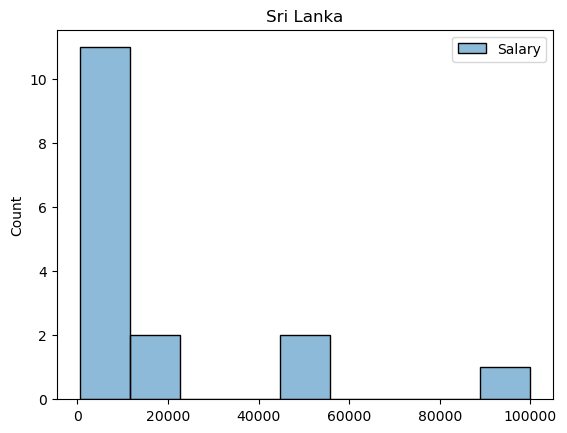

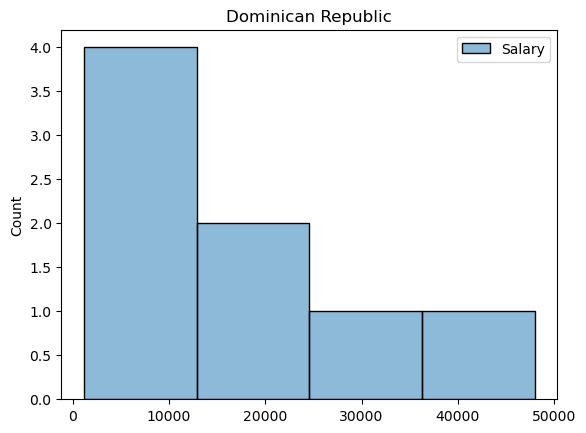

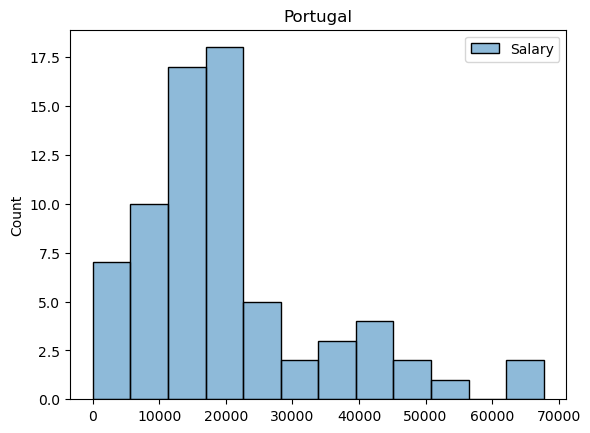

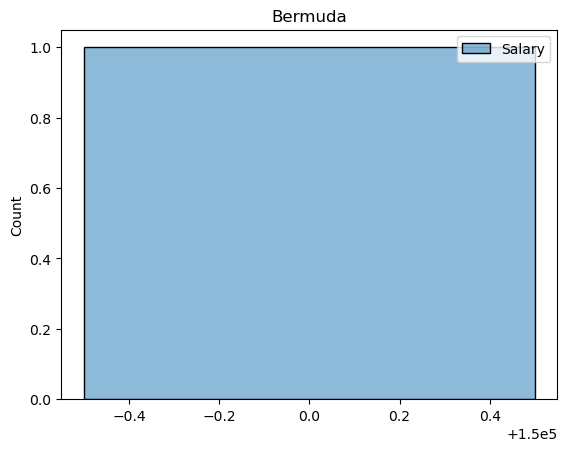

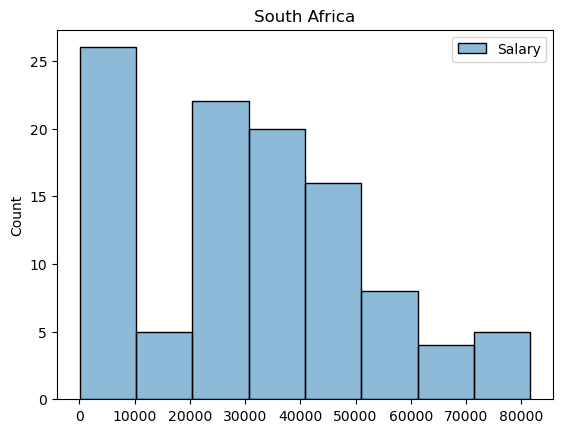

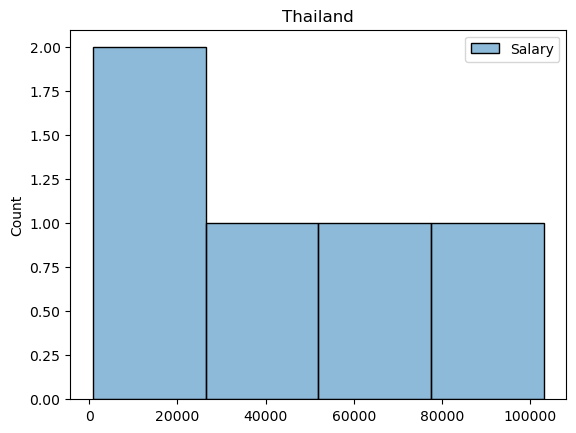

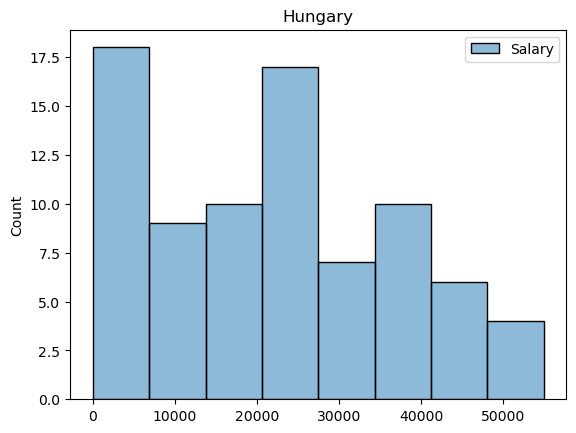

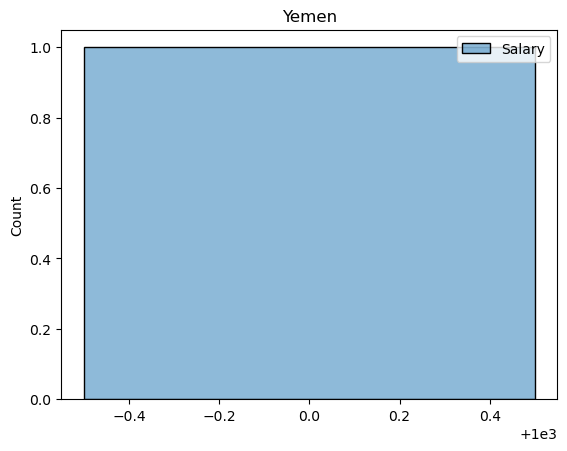

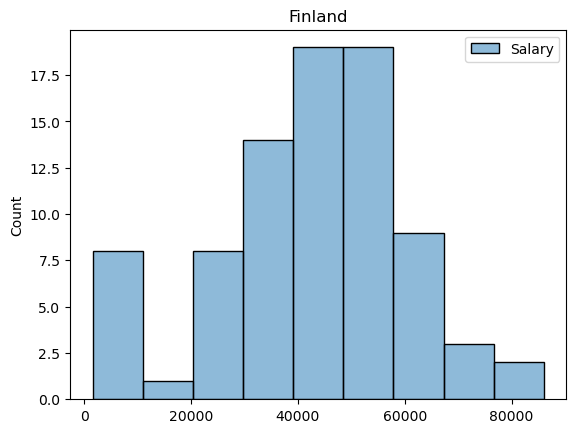

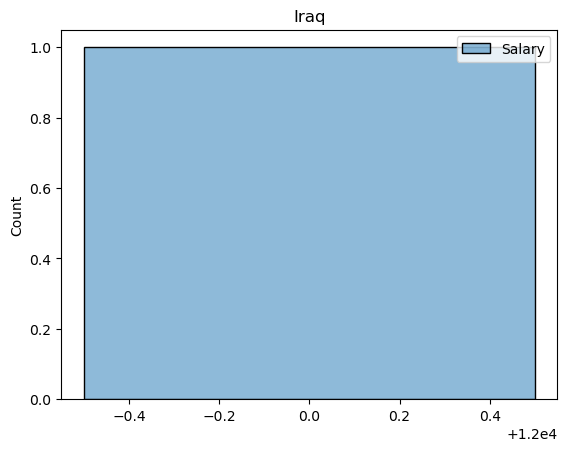

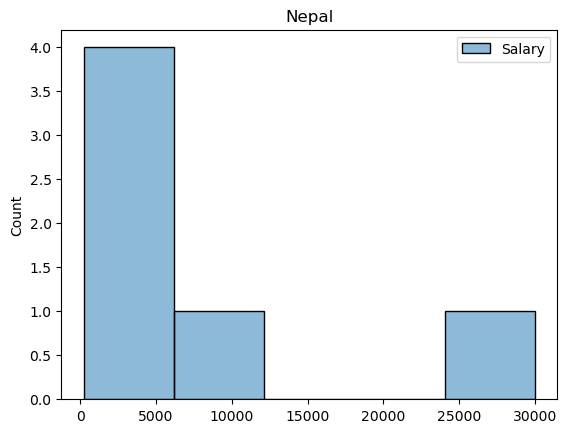

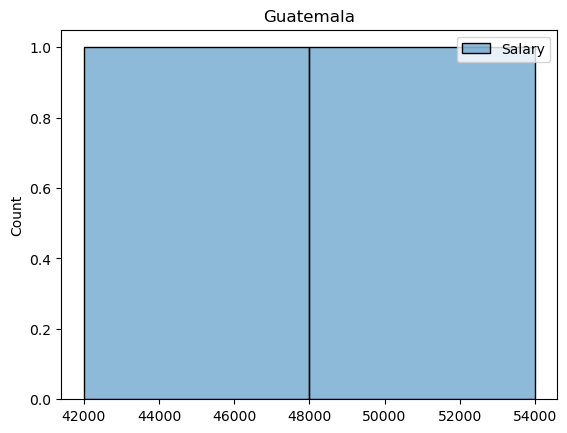

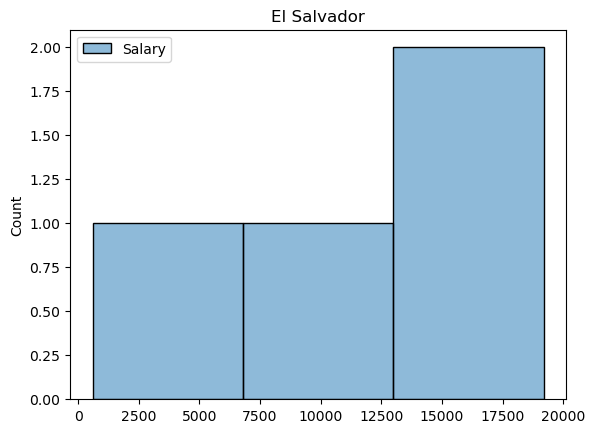

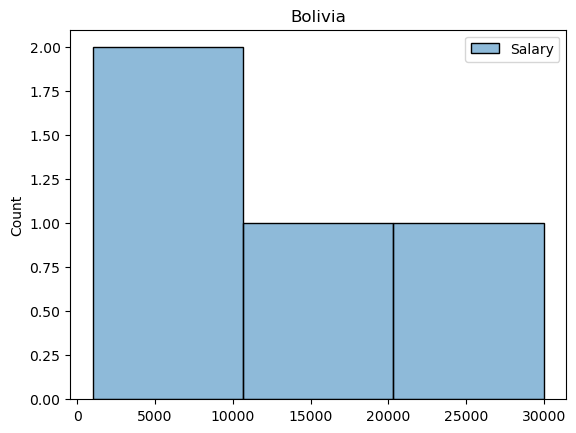

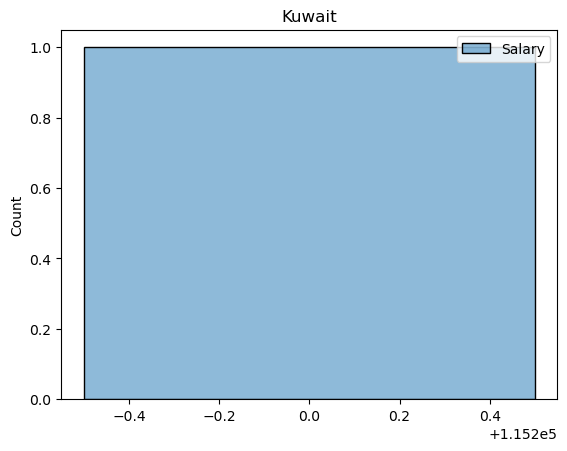

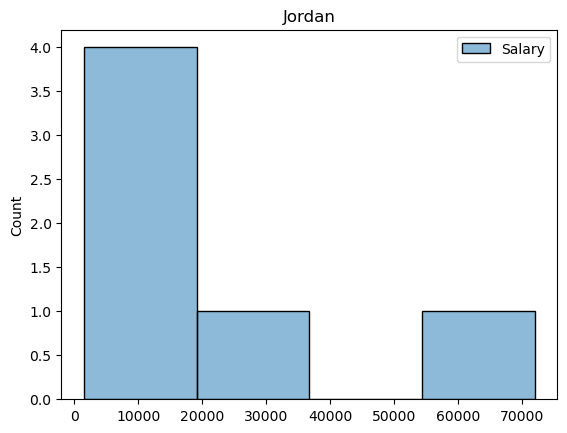

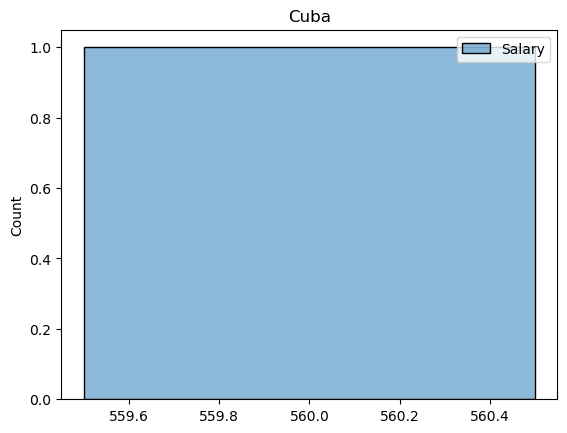

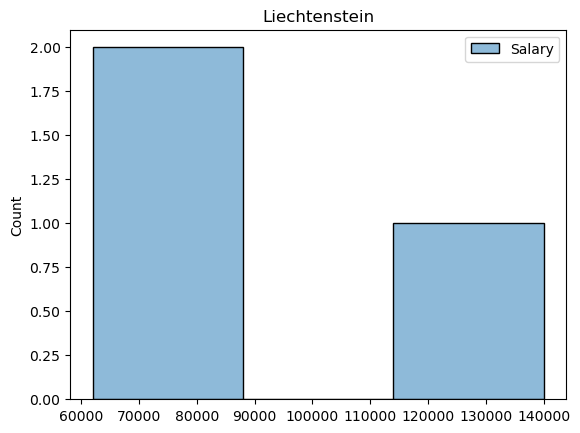

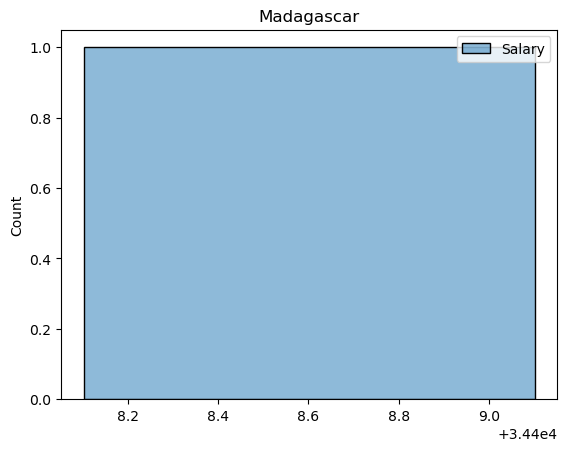

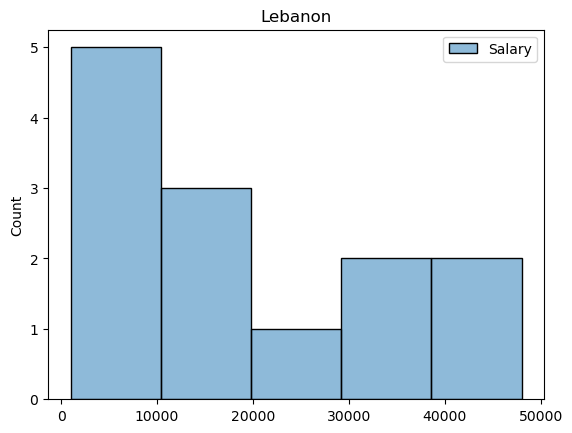

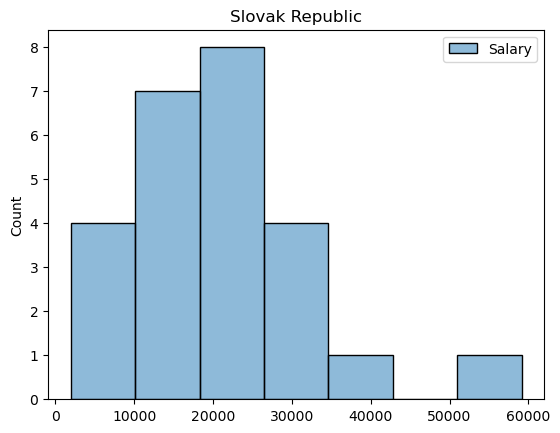

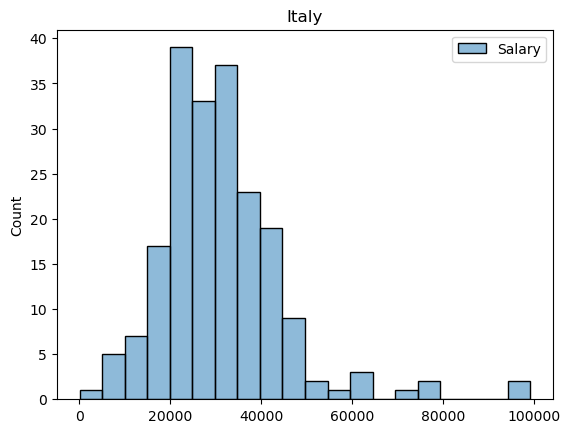

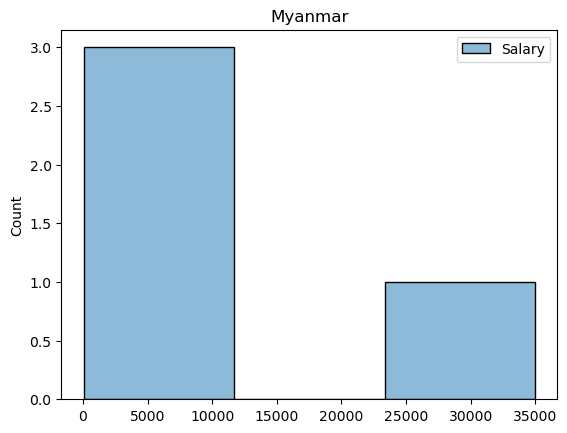

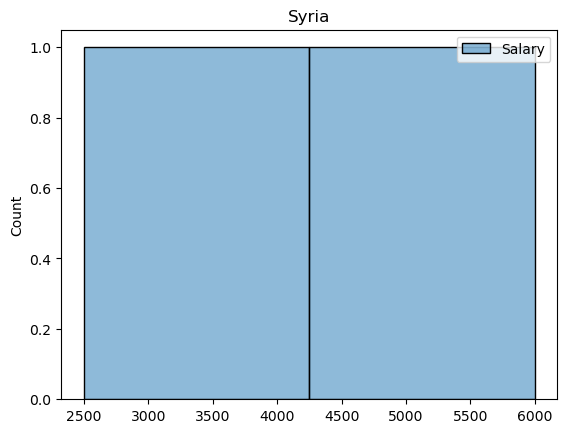

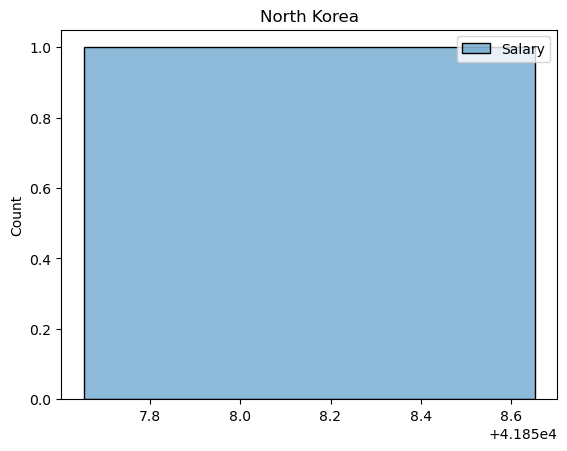

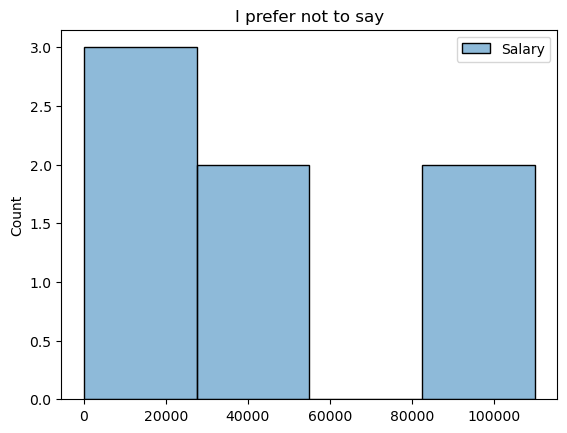

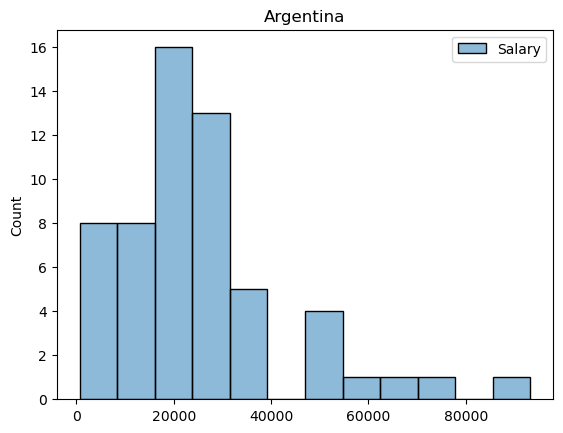

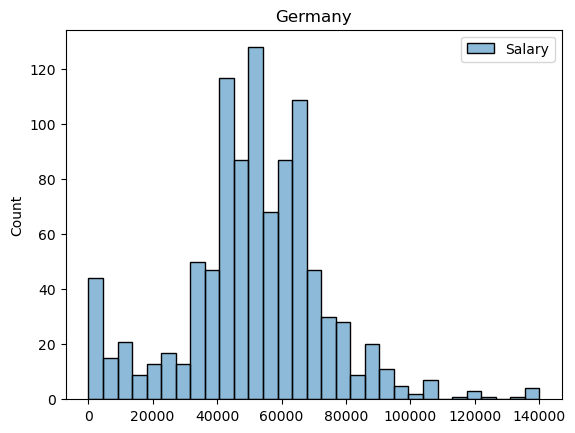

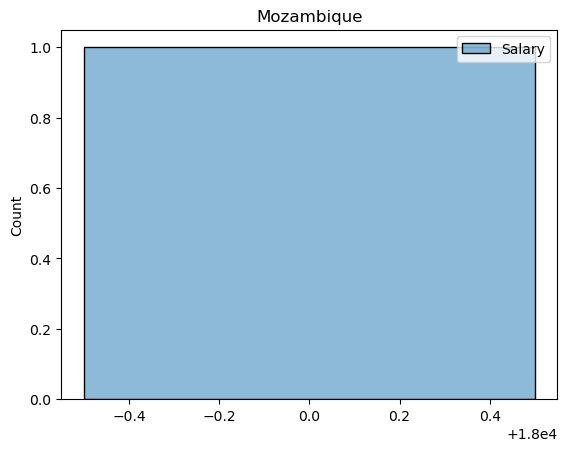

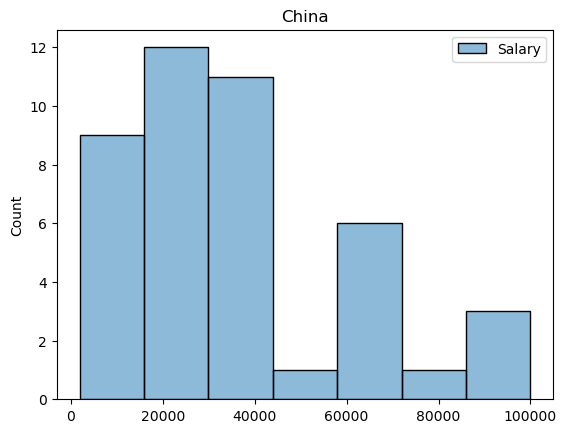

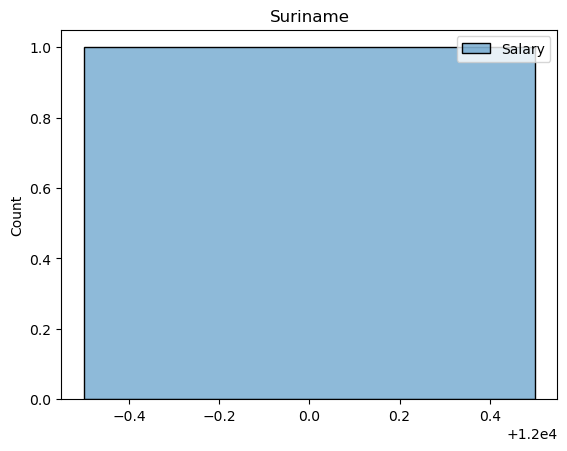

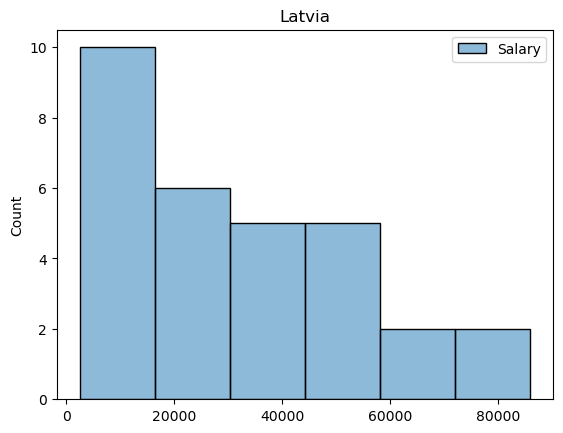

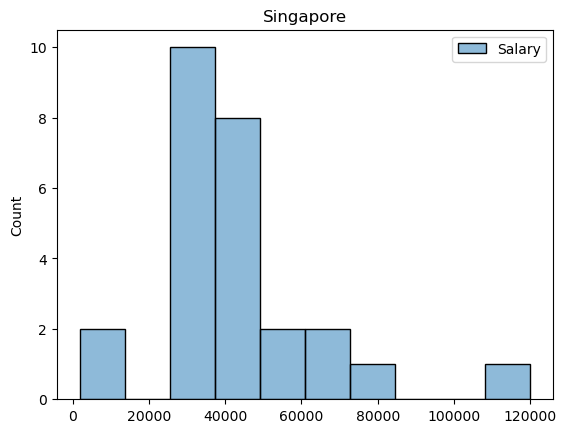

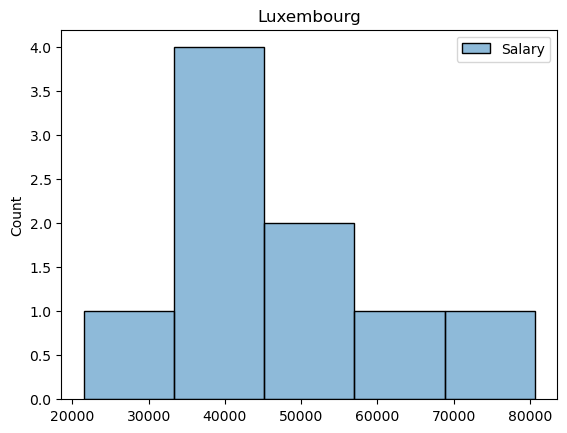

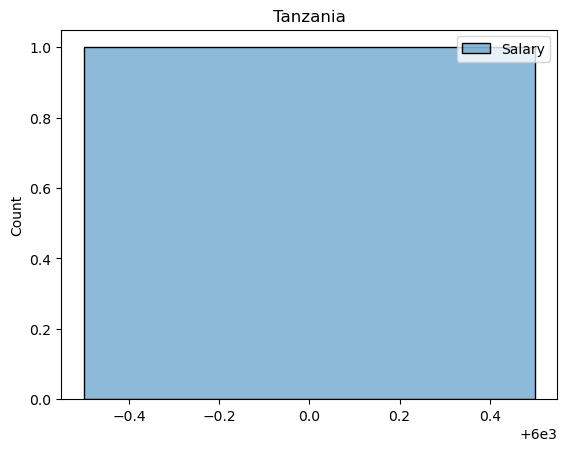

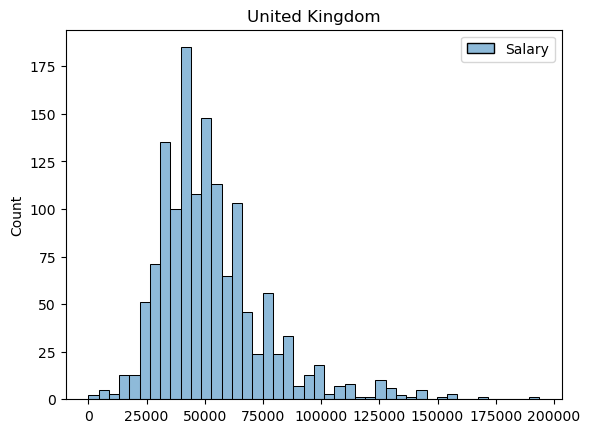

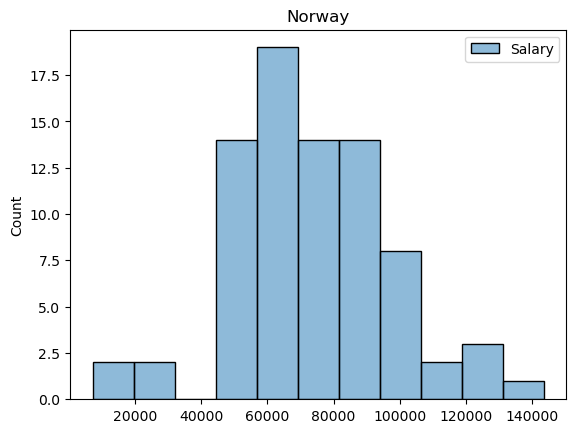

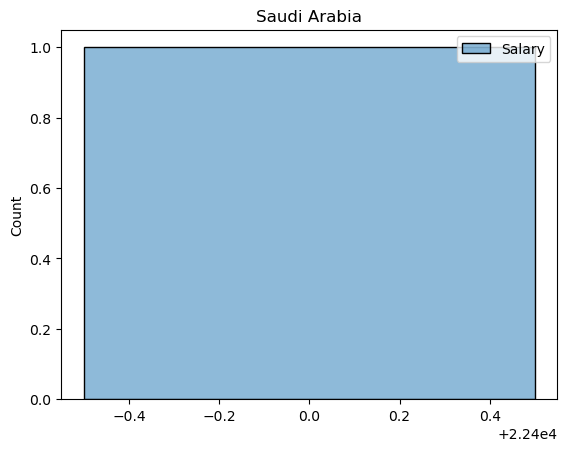

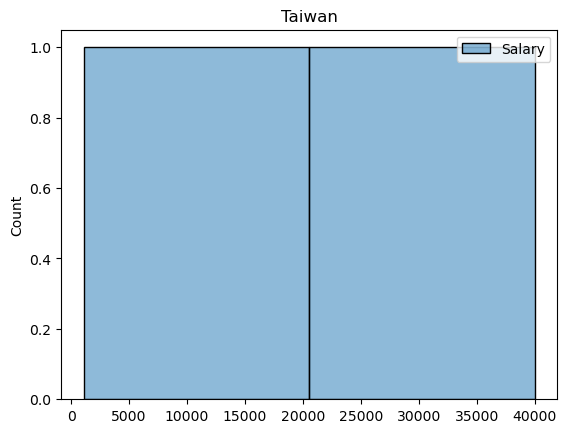

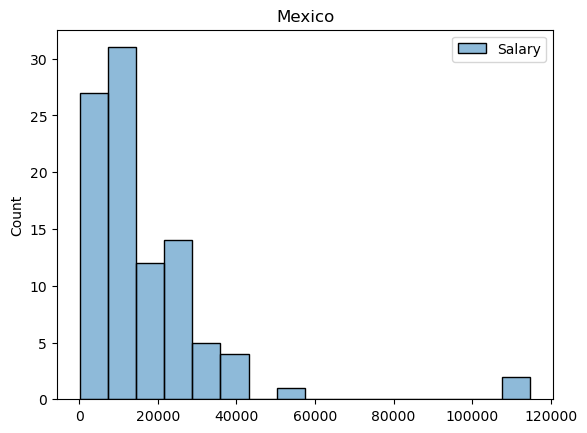

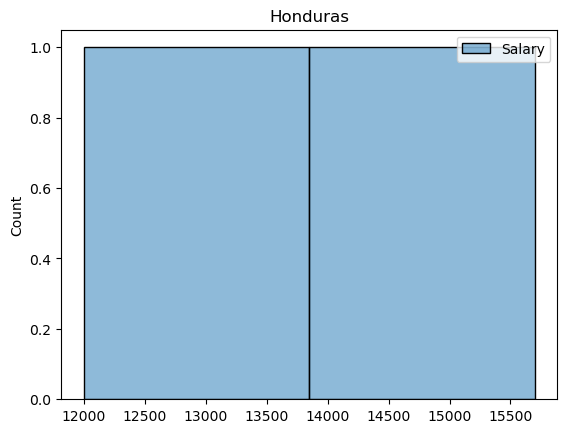

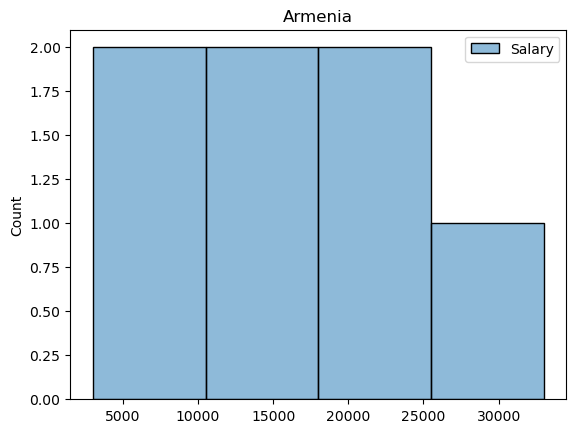

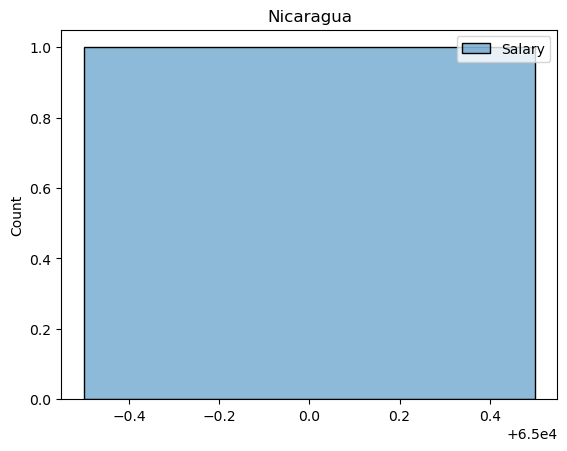

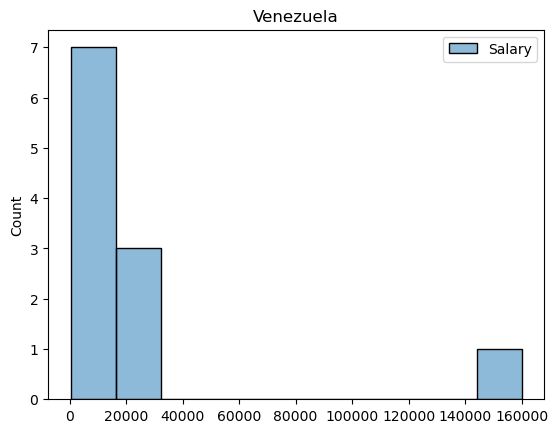

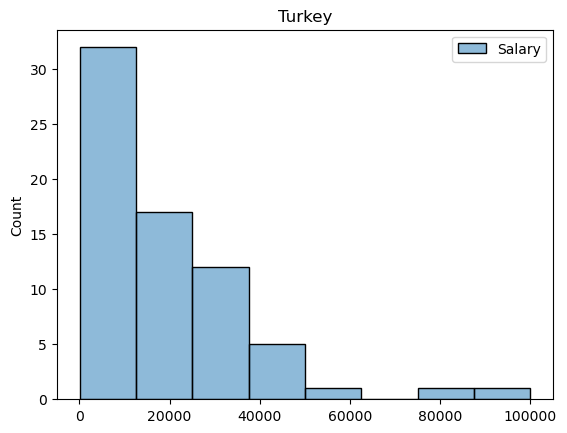

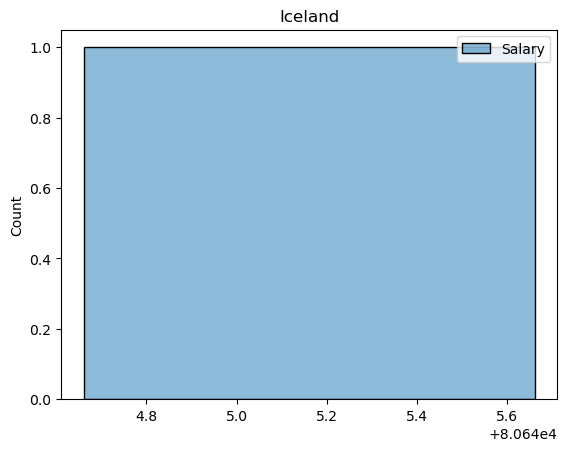

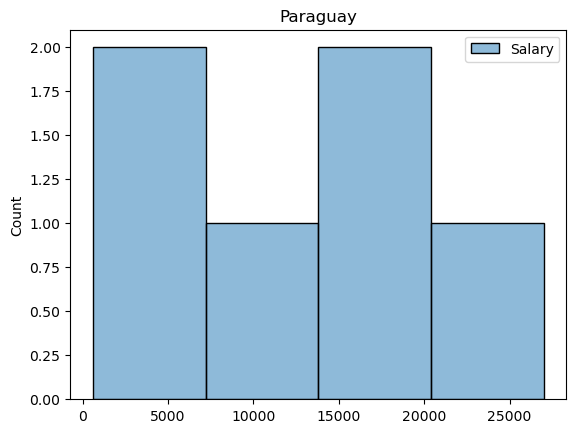

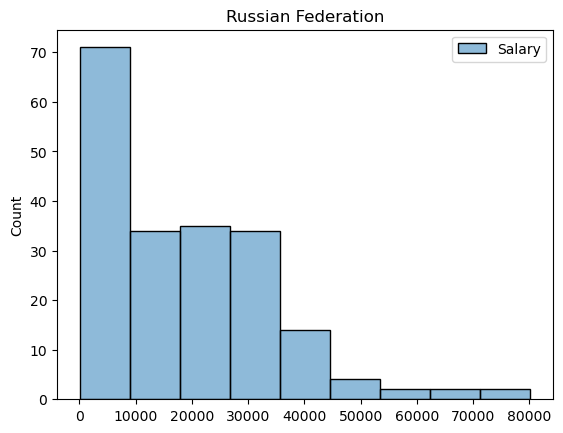

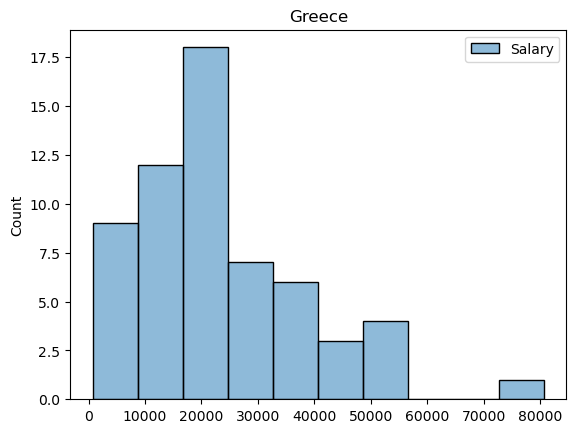

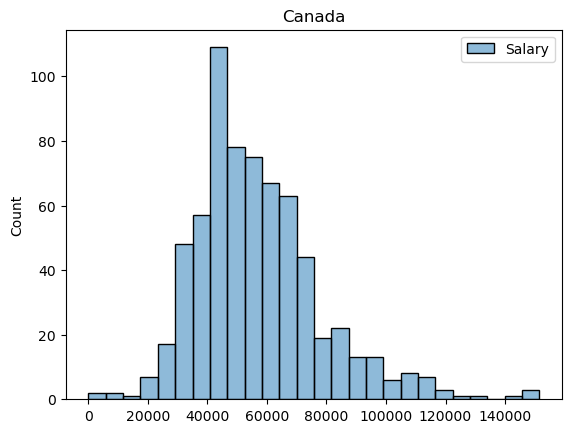

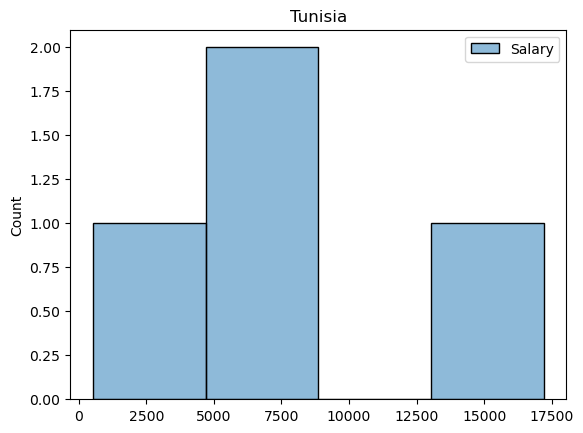

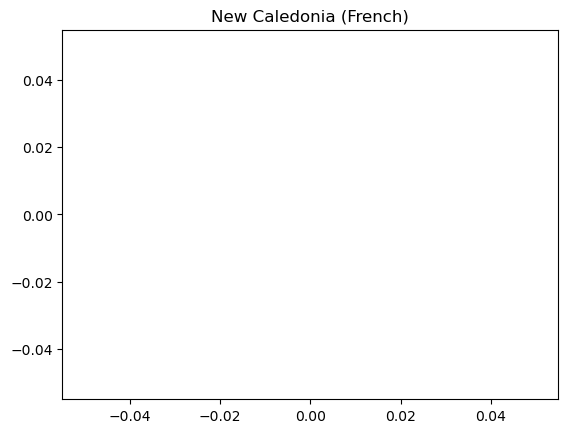

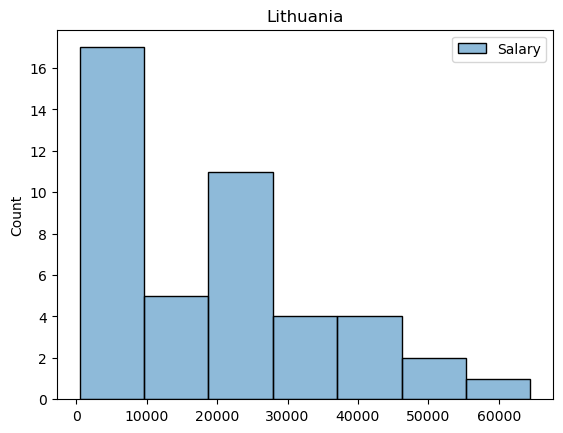

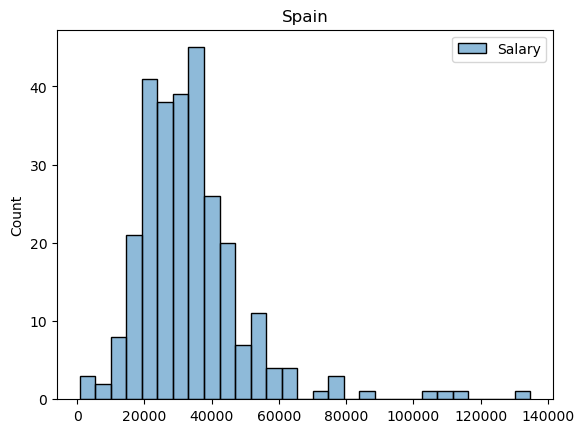

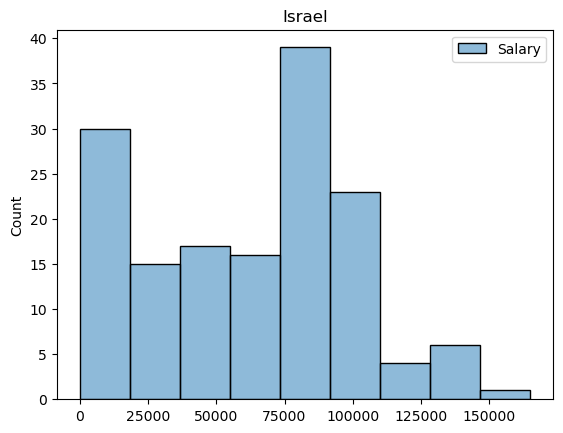

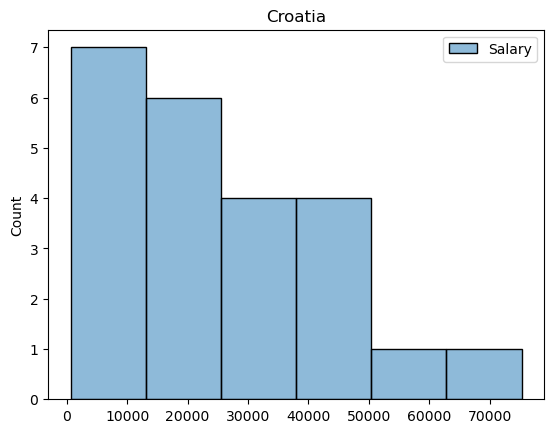

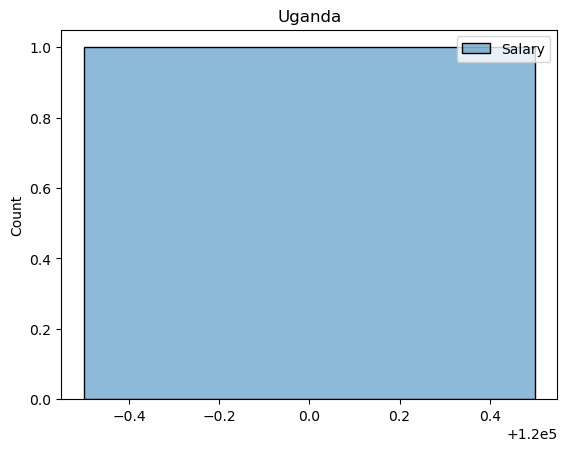

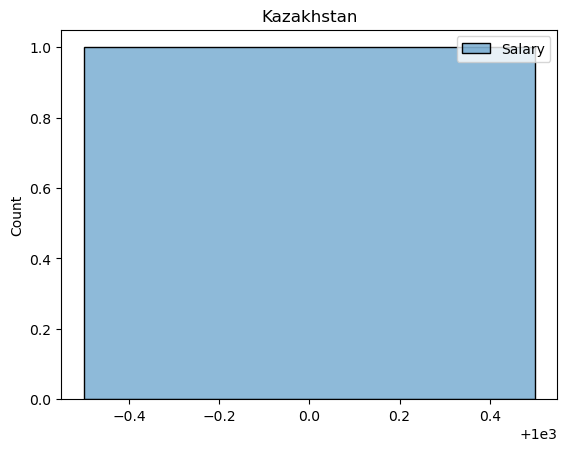

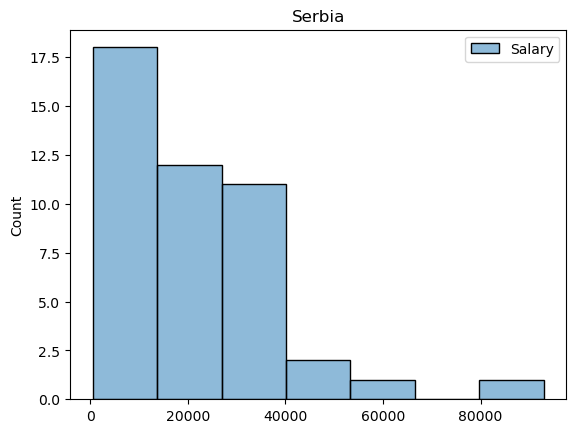

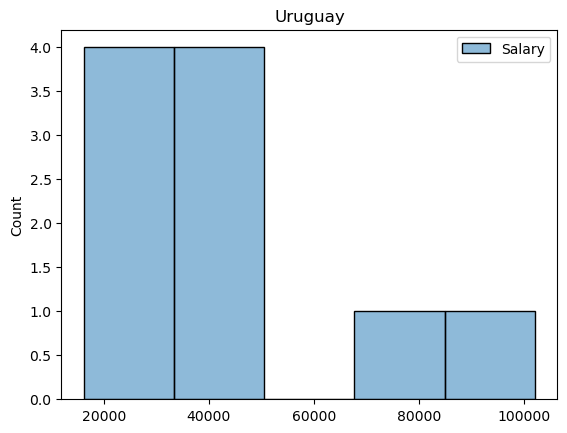

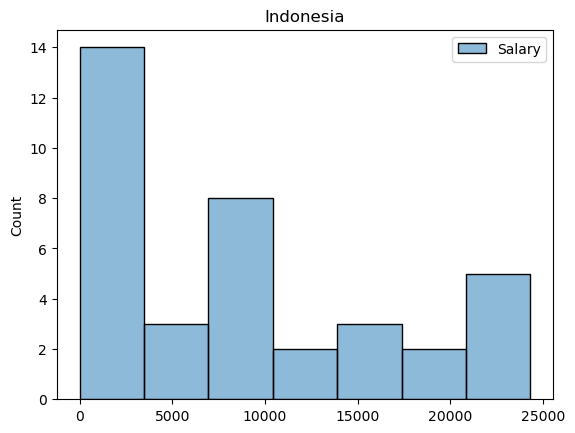

In [42]:
for col in set(df1['Country'].values):
    sns.histplot(df1[df1['Country'].str.match(col)]).set_title(col);
    plt.show()
    
    
    

In [35]:
set(df['Country'].values)

{'Afghanistan',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaidjan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guyana',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibra

In [54]:
# Try to get average salary for each country
avg_row = df1.groupby('Country')['Salary'].mean().reset_index().rename(columns={'Country': 'Country'})

In [55]:
avg_row

Country         Salary
0             Afghanistan   31133.691172
1                 Albania   41455.722763
2                Anguilla  100000.000000
3               Argentina   25771.287719
4                 Armenia   16785.714286
..                    ...            ...
131               Vietnam   13183.333333
132  Virgin Islands (USA)  175000.000000
133                 Yemen    1000.000000
134                 Zaire    4800.000000
135              Zimbabwe     700.000000

[136 rows x 2 columns]

In [65]:
df_=avg_row
sorted_df = df_.sort_values('Salary')

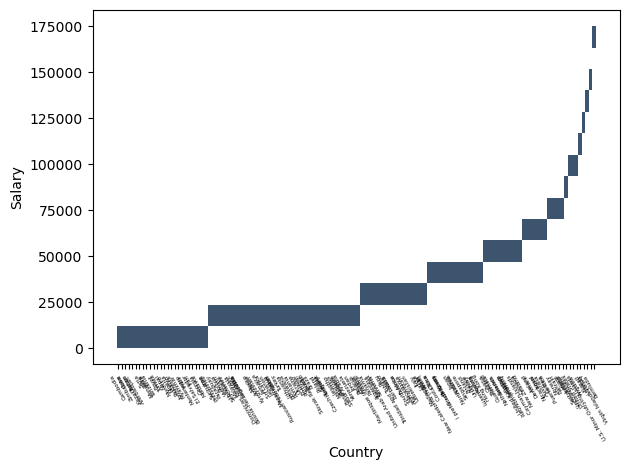

In [70]:
sns.histplot(df_, x=sorted_df['Country'], y=sorted_df['Salary']);
plt.xticks(rotation=120);
plt.xticks(fontsize=4)
plt.tight_layout()

- Let's see the lower salary and higher salary part

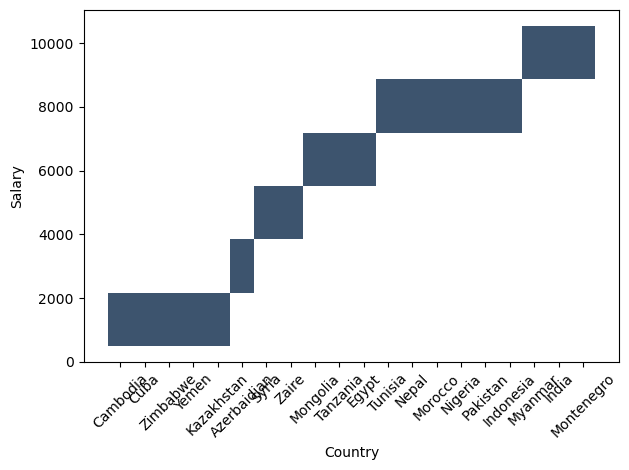

In [75]:
sns.histplot(df_.iloc[0:20,:], x=sorted_df.iloc[0:20,0], y=sorted_df.iloc[0:20,1]);
plt.xticks(rotation=45);
plt.xticks(fontsize=10)
plt.tight_layout()

In [76]:
len(df_)

136

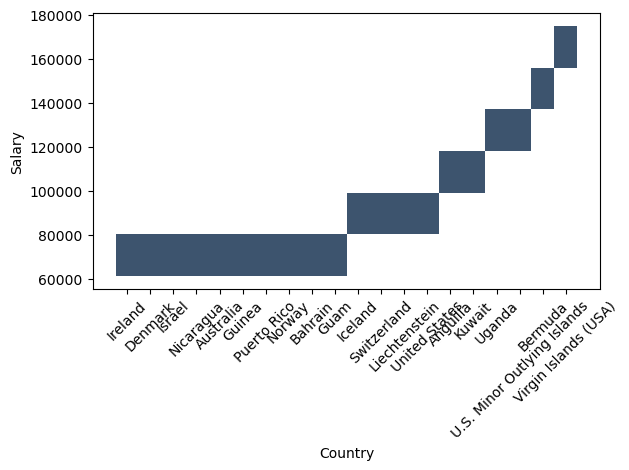

In [78]:
sns.histplot(df_.iloc[-20:,:], x=sorted_df.iloc[-20:,0], y=sorted_df.iloc[-20:,1]);
plt.xticks(rotation=45);
plt.xticks(fontsize=10)
plt.tight_layout()

- As we can see the lower salary countries are mostly developing countries, while the higher salary countries are mostly developed countries.

### Question 3

In [3]:
df=df.dropna(subset=['Salary'], axis=0)
   
y=df['Salary']
df=df.drop(['Salary','Respondent', 'ExpectedSalary'],axis=1)

fill_mean = lambda col: col.fillna(col.mean(),inplace=True)
# Fill the mean

num_vars = df.select_dtypes(include=['float','int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

cat_vars = df.select_dtypes(include=['object']).columns
for var in cat_vars:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)



X=df

In [4]:
df_refine = pd.concat([X,y], axis=1)
df_refine

CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
2                     8.0              9.0       2.64292   
14                    8.0              8.0       2.64292   
17                    9.0              8.0       2.64292   
18                    5.0              3.0       2.64292   
22                    8.0              9.0       2.64292   
...                   ...              ...           ...   
51371                 7.0              7.0       2.64292   
51378                10.0             10.0       2.64292   
51382                 9.0              5.0       0.00000   
51387                 7.0              3.0       5.00000   
51390                 6.0              7.0       1.00000   

       StackOverflowSatisfaction  \
2                       8.000000   
14                      8.000000   
17                      8.000000   
18                      8.511858   
22                      8.000000   
...                          ...   
51371                   8.000000   
51378                  10.000000   
51382                   7.000000   
51387                   9.000000   
51390                   9.000000   

       ProgramHobby_Yes, I contribute to open source projects  \
2                                                      0        
14                                                     0        
17                                                     0        
18                                                     0        
22                                                     0        
...                                                  ...        
51371                                                  0        
51378                                                  1        
51382                                                  0        
51387                                                  0        
51390                                                  0        

       ProgramHobby_Yes, I program as a hobby  ProgramHobby_Yes, both  \
2                                           0                       1   
14                                          1                       0   
17                                          0                       1   
18                                          1                       0   
22                                          0                       0   
...                                       ...                     ...   
51371                                       0                       0   
51378                                       0                       0   
51382                                       1                       0   
51387                                       1                       0   
51390                                       1                       0   

       Country_Albania  Country_Anguilla  Country_Argentina  ...  \
2                    0                 0                  0  ...   
14                   0                 0                  0  ...   
17                   0                 0                  0  ...   
18                   0                 0                  0  ...   
22                   0                 0                  0  ...   
...                ...               ...                ...  ...   
51371                0                 0                  0  ...   
51378                0                 0                  0  ...   
51382                0                 0                  0  ...   
51387                0                 0                  0  ...   
51390                0                 0                  0  ...   

       QuestionsInteresting_Strongly disagree  QuestionsConfusing_Disagree  \
2                                           0                            1   
14                                          0                            1   
17                                          0                            1   
18                                          0                     

In [ ]:
# Let's see which factor is most important

In [22]:
df_refine.columns[0:-1]

Index(['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek',
       'StackOverflowSatisfaction',
       'ProgramHobby_Yes, I contribute to open source projects',
       'ProgramHobby_Yes, I program as a hobby', 'ProgramHobby_Yes, both',
       'Country_Albania', 'Country_Anguilla', 'Country_Argentina',
       ...
       'QuestionsInteresting_Strongly agree',
       'QuestionsInteresting_Strongly disagree', 'QuestionsConfusing_Disagree',
       'QuestionsConfusing_Somewhat agree',
       'QuestionsConfusing_Strongly agree',
       'QuestionsConfusing_Strongly disagree', 'InterestedAnswers_Disagree',
       'InterestedAnswers_Somewhat agree', 'InterestedAnswers_Strongly agree',
       'InterestedAnswers_Strongly disagree'],
      dtype='object', length=21107)

In [5]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
feat_names = df_refine.columns[0:-1]
rf = RandomForestRegressor(random_state=99)
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

Features sorted by their score:
[(0.4157, 'Country_United States'), (0.0784, 'YearsProgram_20 or more years'), (0.0254, 'Country_India'), (0.0175, 'Overpaid_Greatly underpaid'), (0.0126, 'University_No'), (0.0122, 'Currency_Swiss francs'), (0.0087, 'Country_Germany'), (0.0086, 'Overpaid_Somewhat underpaid'), (0.0082, 'Country_Canada'), (0.0078, 'Country_Australia'), (0.0071, 'CompanyType_Publicly-traded corporation'), (0.0068, 'TabsSpaces_Spaces'), (0.0062, 'Country_Switzerland'), (0.0061, 'CompanyType_Venture-funded startup'), (0.0059, 'Country_United Kingdom'), (0.0054, 'Country_Israel'), (0.0051, 'Currency_Euros (€)'), (0.0044, 'YearsCodedJob_Less than a year'), (0.0044, 'Country_Norway'), (0.0036, "FormalEducation_Master's degree"), (0.0035, 'StackOverflowSatisfaction'), (0.0035, 'CareerSatisfaction'), (0.0033, 'YearsCodedJob_2 to 3 years'), (0.0033, 'EmploymentStatus_Employed part-time'), (0.0031, 'YearsCodedJob_20 or more years'), (0.0031, 'JobSatisfaction'), (0.0031, 'HomeRemote

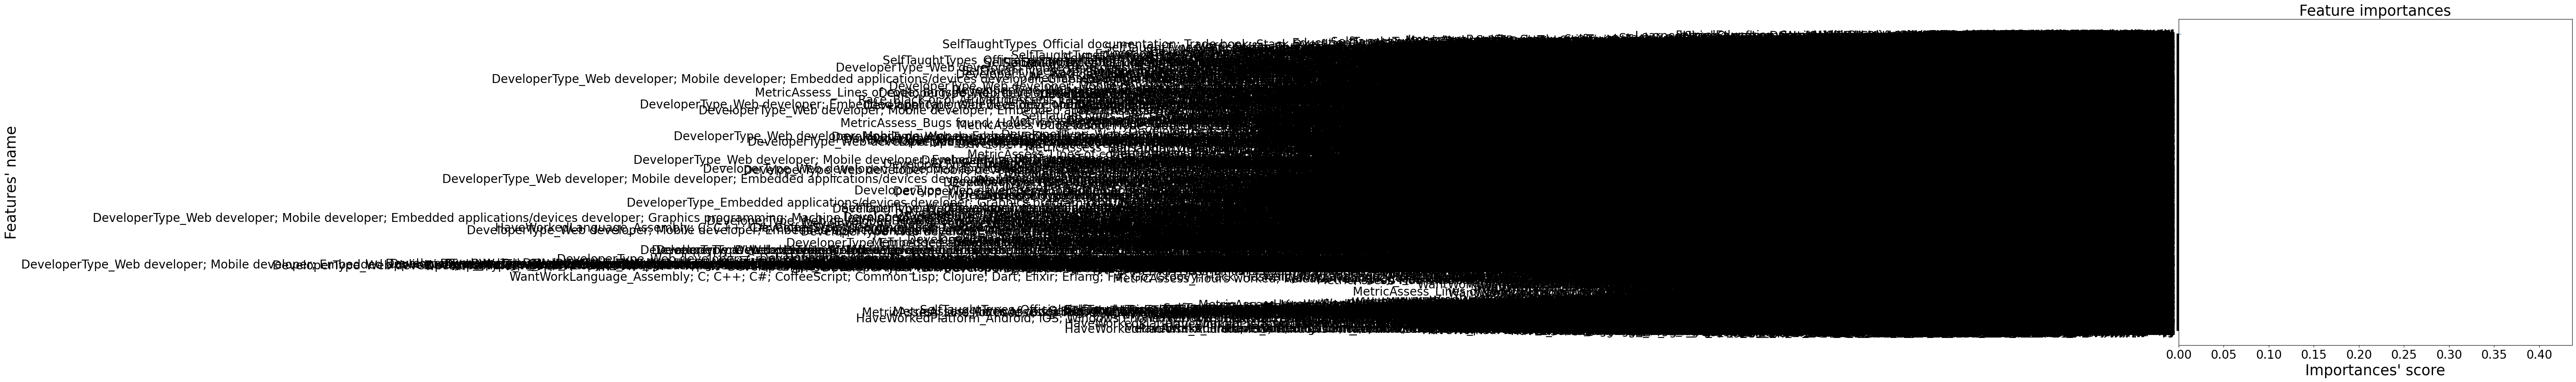

In [6]:
plt.figure(figsize=(12,10))
# plt.figure()
importances=rf.feature_importances_
x_plot = [2*i for i in range(len(importances))]
indices=np.argsort(importances)
plt.title("Feature importances",fontsize=25)
plt.barh(x_plot, importances[indices],height=1.8,color='#1f77b4')
# ,height=1.8
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.xlabel("Importances' score",fontsize=25)
plt.ylabel("Features' name",fontsize=25)
plt.yticks(x_plot, feat_names[indices],fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('Random forest all.pdf', dpi=300, bbox_inches='tight')
plt.show()

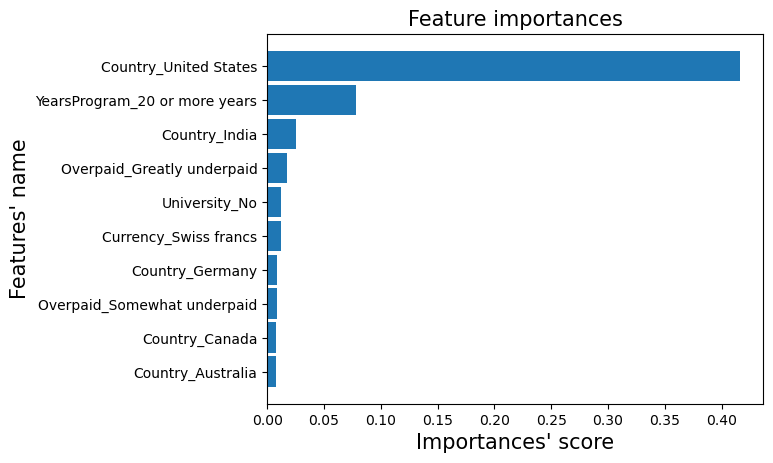

In [49]:
x_plot = [2*i for i in range(len(importances))]
indices=np.argsort(importances)
plt.title("Feature importances",fontsize=15)
plt.barh(x_plot[:-11:-1], importances[indices[:-11:-1]],height=1.8,color='#1f77b4')
# ,height=1.8
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.xlabel("Importances' score",fontsize=15)
plt.ylabel("Features' name",fontsize=15)
plt.yticks(x_plot[:-11:-1], feat_names[indices[:-11:-1]],fontsize=10)
plt.xticks(fontsize=10)
# plt.savefig('Random forest all.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
feat_names[indices[:-11:-1]]

Index(['Country_United States', 'YearsProgram_20 or more years',
       'Country_India', 'Overpaid_Greatly underpaid', 'University_No',
       'Currency_Swiss francs', 'Country_Germany',
       'Overpaid_Somewhat underpaid', 'Country_Canada', 'Country_Australia'],
      dtype='object')

In [41]:
# Standardize function
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

df_normalized = z_score(df_refine)

In [46]:
# randomforestregressor method for 5 features
from sklearn.model_selection import cross_val_score
from sklearn import metrics

X_train_rf,X_test_rf,Y_train_rf,Y_test_rf = train_test_split(df_normalized.loc[:,['Country_United States', 'YearsProgram_20 or more years',
       'Country_India', 'Overpaid_Greatly underpaid', 'University_No']],
                                                 df_normalized.loc[:,['Salary']],train_size=0.8,random_state=12 )

linreg_rf=LinearRegression()
linreg_rf.fit(X_train_rf.values,Y_train_rf.values)
y_pred_rf=linreg_rf.predict(X_test_rf.values)
linreg_score_rf=-cross_val_score(linreg_rf,X_train_rf.values,Y_train_rf.values,cv=5,scoring='neg_mean_squared_error')
print('Mean Squared error for each cross validation subset:',linreg_score_rf)

linreg_r2score_rf=cross_val_score(linreg_rf,X_train_rf.values,Y_train_rf.values,cv=5,scoring='r2')
average_linreg_r2score_rf=np.mean(linreg_r2score_rf)
print('R\u00b2 for each cross validation subset:',linreg_r2score_rf)
print('Average R\u00b2 for cross validation',average_linreg_r2score_rf)

print('Mean Squared error for prediction:',metrics.mean_squared_error(Y_test_rf, y_pred_rf))
print('R\u00b2 for Prediction:',metrics.r2_score(Y_test_rf, y_pred_rf))

Mean Squared error for each cross validation subset: [0.43261485 0.47801422 0.44484601 0.43457238 0.46893905]
R² for each cross validation subset: [0.54640965 0.55157019 0.54487031 0.56410121 0.53824231]
Average R² for cross validation 0.5490387330974461
Mean Squared error for prediction: 0.4348882625784763
R² for Prediction: 0.5609835741259532


- As we can see the top 5 features is related to country, years of programing, Overpaid or University. We use this features to train a model, the average R2 can reach 0.56.